# Predicción de resultados de fútbol usando Aprendizaje Automático Federado: Preprocesamiento y Validación de Aprendizaje Federado.

### Curso académico 2023-2024

#### Autor:

- Pablo Rodríguez Royo

---

In [3]:
!python -m pip install flwr[simulation]

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 22.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 81.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 75.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.7/364.7 kB 23.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.59.3
    Uninstalling grpcio-1.59.3:
      Successfully uninstalled grpcio-1.59.3
  Attempting uninstall: cryptography
    Found existing installation: cryptography 41.0.7
    Uninstalling cryptography-41.0.7:
      Successfully uninstalled cryptography-41.0.7
  Attempting uninstall: ray
    Found existing installation: ray 2.9.0
    Unins

In [4]:
!python -m pip install plot_keras_history

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9454 sha256=7f6a17b2657ac19fdebe61c46e0d96b5c6fabdb5b67be930ac462f41f93b71cf
  Stored in directory: /root/.cache/pip/wheels/2f/31/6c/bbc9703b7baa8bd3802a8aedd9e2f9e66941b0cf0d456ab4cc
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.51-py3-none-any.whl size=321863 sha256=b9dbd27309174a8d2f85f7f4cf1413b5f97236c84db9bb751ed5b5b8e6b7c725
  Stored in directory: /root/.cache/pip/wheels/30/9f/f5/37d037c39ac8b305590d5956f7021c6ca94b63c68be24f6841
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl size=5630 sha256=74c6fbe05959b3478d33ca190bd8e448247644a1ea0ce2be85da5b125de937ac
  Stored in director

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import random
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import flwr as fl
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import warnings
from plot_keras_history import plot_history
import json
from tensorflow.keras.models import Sequential
import tensorflow.keras as keras
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from tensorflow.keras.callbacks import History
import json



2024-07-01 08:50:49,730	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [6]:
warnings.simplefilter('ignore')

A continuación, se importa el conjunto de datos resultante del cuaderno/libreta anterior a este.

In [7]:
matches = pd.read_csv("/kaggle/input/matches/matches.csv")

# matches = pd.read_csv("/data/matches.csv")

In [ ]:
# matches_to_predict = matches[matches['year']==2015]
# pipeline = get_pipeline('0')
# matches_to_predict = matches_to_predict.drop(columns=['home_team_goal', 'away_team_goal', 'league_id', 'season', 'home_team_api_id', 'away_team_api_id'])
# X = matches_to_predict.drop(columns=['RESULT', 'match_api_id'])
# y = matches_to_predict['RESULT']
# match_id = matches_to_predict['match_api_id']
# X = pipeline.fit_transform(X)
# combined_df = pd.concat([X, y], axis=1)
# combined_df = pd.concat([ match_id, combined_df], axis=1)
# combined_df.to_csv('matches_2015_normalized.csv', index=False)

In [13]:
for column in matches.columns:
  print(column)

country_id
league_id
season
stage
match_api_id
home_team_api_id
away_team_api_id
home_team_goal
away_team_goal
year
RESULT
PTS_5_PREV_L
PTS_5_PREV_V
DIF_PTS_5
CUOTA_L
CUOTA_E
CUOTA_V
L_VAL_MEDIA_POR
L_VAL_MEDIA_DEF
L_VAL_MEDIA_MC
L_VAL_MEDIA_DEL
A_VAL_MEDIA_POR
A_VAL_MEDIA_DEF
A_VAL_MEDIA_MC
A_VAL_MEDIA_DEL
HGC
AGC
HGS
AGS
HGC_AS_HOME
AGC_AS_AWAY
HGS_AS_HOME
AGS_AS_AWAY
HGD
AGD
L_PTS
A_PTS
PTS_DIFF
HOME_ATTACK_STRENGTH
HOME_DEFENSE_STRENGTH
AWAY_ATTACK_STRENGTH
AWAY_DEFENSE_STRENGTH
xG_H
xG_A
xG_DIFF


# 1. Preprocesamiento de datos

In [5]:
matches.shape

(25979, 45)

Con el fin de realizar un preprocesamiento adaptado a cada país, se van a observar las columnas con valores perdidos de cada uno y el número de estos.

In [8]:
# Prepara los datos de cada país
matches_spain = matches[matches['country_id'] == 21518].drop(columns=['match_api_id',  'home_team_goal', 'away_team_goal', 'country_id', 'league_id', 'season', 'home_team_api_id', 'away_team_api_id'])
matches_england = matches[matches['country_id'] == 1729].drop(columns=['match_api_id',  'home_team_goal', 'away_team_goal', 'country_id', 'league_id', 'season', 'home_team_api_id', 'away_team_api_id'])
matches_italy = matches[matches['country_id'] == 10257].drop(columns=['match_api_id',  'home_team_goal', 'away_team_goal', 'country_id', 'league_id', 'season', 'home_team_api_id', 'away_team_api_id'])
matches_france = matches[matches['country_id'] == 4769].drop(columns=['match_api_id',  'home_team_goal', 'away_team_goal', 'country_id', 'league_id', 'season', 'home_team_api_id', 'away_team_api_id'])
matches_germany = matches[matches['country_id'] == 7809].drop(columns=['match_api_id', 'home_team_goal', 'away_team_goal', 'country_id', 'league_id', 'season', 'home_team_api_id', 'away_team_api_id'])
matches_belgium = matches[matches['country_id'] == 1].drop(columns=['match_api_id',  'home_team_goal', 'away_team_goal', 'country_id', 'league_id', 'season', 'home_team_api_id', 'away_team_api_id'])
matches_netherlands = matches[matches['country_id'] == 13274].drop(columns=['match_api_id', 'home_team_goal', 'away_team_goal', 'country_id', 'league_id', 'season', 'home_team_api_id', 'away_team_api_id'])
matches_portugal = matches[matches['country_id'] == 17642].drop(columns=['match_api_id', 'home_team_goal', 'away_team_goal', 'country_id', 'league_id', 'season', 'home_team_api_id', 'away_team_api_id'])
matches_poland = matches[matches['country_id'] == 15722].drop(columns=['match_api_id',  'home_team_goal', 'away_team_goal', 'country_id', 'league_id', 'season', 'home_team_api_id', 'away_team_api_id'])
matches_switzerland = matches[matches['country_id'] == 24558].drop(columns=['match_api_id',  'home_team_goal', 'away_team_goal', 'country_id', 'league_id', 'season', 'home_team_api_id', 'away_team_api_id'])
matches_scotland = matches[matches['country_id'] == 19694].drop(columns=['match_api_id',  'home_team_goal', 'away_team_goal', 'country_id', 'league_id', 'season', 'home_team_api_id', 'away_team_api_id'])

# muestra para cada pais las columnas con mas de 0 valores perdidos
print("Spain")
val_Nan_spain = matches_spain.isna().sum()
print(val_Nan_spain[val_Nan_spain > 0])
print("England")
val_Nan_england = matches_england.isna().sum()
print(val_Nan_england[val_Nan_england > 0])
print("Italy")
val_Nan_italy = matches_italy.isna().sum()
print(val_Nan_italy[val_Nan_italy > 0])
print("France")
val_Nan_france = matches_france.isna().sum()
print(val_Nan_france[val_Nan_france > 0])
print("Germany")
val_Nan_germany = matches_germany.isna().sum()
print(val_Nan_germany[val_Nan_germany > 0])
print("Belgium")
val_Nan_belgium = matches_belgium.isna().sum()
print(val_Nan_belgium[val_Nan_belgium > 0])
print("Netherlands")
val_Nan_netherlands = matches_netherlands.isna().sum()
print(val_Nan_netherlands[val_Nan_netherlands > 0])
print("Portugal")
val_Nan_portugal = matches_portugal.isna().sum()
print(val_Nan_portugal[val_Nan_portugal > 0])
print("Poland")
val_Nan_poland = matches_poland.isna().sum()
print(val_Nan_poland[val_Nan_poland > 0])
print("Switzerland")
val_Nan_switzerland = matches_switzerland.isna().sum()
print(val_Nan_switzerland[val_Nan_switzerland > 0])
print("Scotland")
val_Nan_scotland = matches_scotland.isna().sum()
print(val_Nan_scotland[val_Nan_scotland > 0])



Spain
CUOTA_L             1
CUOTA_E             1
CUOTA_V             1
L_VAL_MEDIA_POR    17
L_VAL_MEDIA_DEL    13
A_VAL_MEDIA_POR    15
A_VAL_MEDIA_DEL    16
dtype: int64
England
L_VAL_MEDIA_DEL    2
A_VAL_MEDIA_DEL    3
dtype: int64
Italy
CUOTA_L             3
CUOTA_E             3
CUOTA_V             3
L_VAL_MEDIA_POR    24
L_VAL_MEDIA_DEL     6
A_VAL_MEDIA_POR    21
A_VAL_MEDIA_DEL    10
dtype: int64
France
CUOTA_L             3
CUOTA_E             3
CUOTA_V             3
L_VAL_MEDIA_POR    69
L_VAL_MEDIA_DEL    17
A_VAL_MEDIA_POR    65
A_VAL_MEDIA_DEL    25
dtype: int64
Germany
CUOTA_L             1
CUOTA_E             1
CUOTA_V             1
L_VAL_MEDIA_POR    12
L_VAL_MEDIA_DEL     5
A_VAL_MEDIA_POR    12
A_VAL_MEDIA_DEL     5
dtype: int64
Belgium
CUOTA_L             22
CUOTA_E             22
CUOTA_V             22
L_VAL_MEDIA_POR    219
L_VAL_MEDIA_DEF    208
L_VAL_MEDIA_MC     208
L_VAL_MEDIA_DEL    234
A_VAL_MEDIA_POR    226
A_VAL_MEDIA_DEF    208
A_VAL_MEDIA_MC     209
A_VA

Por lo general, se podrian imputar por el método de los vecinos, los valores perdidos de las variables de las `Cuotas` y `VAL_MEDIA` que practicamente se repiten en todas las ligas y al no ser muy numerosos podriamos utilizar este método para imputar. Sin embargo hay dos ligas en las que no podriamos utilizar este tipo de imputación, que son Polonia y Suiza. En el caso de Polonia de las variables `Cuotas` es muy alto, de hecho ningún partido durante las 8 temporadas tiene asignados valores en estas variables. Además en las variables `VAL_MEDIA` más del 30% de los valores también son perdidos, por lo que se ha optado por la imputación uniforme.

Respecto a las `Cuotas`, dado que hay tres resultados posibles (local, empate, visitante), la probabilidad implícita de cada resultado será 1/3, por lo tanto las cuotas equitativas serían:

$\text{Cuota} = \frac{1}{\frac{1}{3}} = 3$

## 1.2 Creación de los pipelines

In [9]:
from sklearn import set_config

set_config(transform_output="pandas")

In [10]:
cuotas_uniform_imputer = make_column_transformer(
    (SimpleImputer(strategy='constant', fill_value=3), ['CUOTA_L', 'CUOTA_V', 'CUOTA_E']),
    remainder='passthrough',
    verbose_feature_names_out=False,
)
valores_uniform_imputer = make_column_transformer(
    (SimpleImputer(strategy='constant', fill_value=70), ['L_VAL_MEDIA_POR', 'A_VAL_MEDIA_POR', 'L_VAL_MEDIA_DEF', 'A_VAL_MEDIA_DEF', 'L_VAL_MEDIA_MC', 'A_VAL_MEDIA_MC', 'L_VAL_MEDIA_DEL', 'A_VAL_MEDIA_DEL']),
    remainder='passthrough',
    verbose_feature_names_out=False,

)
normalizer = MinMaxScaler()

knn_imputer = make_column_transformer(
    (KNNImputer(n_neighbors=3), ['L_VAL_MEDIA_POR', 'A_VAL_MEDIA_POR', 'L_VAL_MEDIA_DEF', 'A_VAL_MEDIA_DEF', 'L_VAL_MEDIA_MC', 'A_VAL_MEDIA_MC', 'L_VAL_MEDIA_DEL', 'A_VAL_MEDIA_DEL', 'CUOTA_L', 'CUOTA_V', 'CUOTA_E']),
    remainder='passthrough',
    verbose_feature_names_out=False,

)

In [11]:
def get_pipeline(country):
  if (country=='8' or country==8):
    pipeline_poland = make_pipeline(
      cuotas_uniform_imputer,
      valores_uniform_imputer,
      normalizer,
    )
    return pipeline_poland
  elif(country == '9' or country == 9):
    pipeline_switzerland = make_pipeline(
      cuotas_uniform_imputer,
      normalizer,
      knn_imputer,
    )
    return pipeline_switzerland
  else:
    pipeline_general = make_pipeline(
      normalizer,
      knn_imputer,
    )
    return pipeline_general


# Ejemplo de uso
pipeline = get_pipeline(8)
pipeline

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simpleimputer',
                                                  SimpleImputer(fill_value=3,
                                                                strategy='constant'),
                                                  ['CUOTA_L', 'CUOTA_V',
                                                   'CUOTA_E'])],
                                   verbose_feature_names_out=False)),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simpleimputer',
                                                  SimpleImputer(fill_value=70,
                                                                strategy='constant'),
                                                  ['L_VAL_MEDIA_POR',
                                                   'A_VAL_MEDIA_POR',
                                                   'L_VAL_MEDIA_DEF',
                                                   'A_VAL_MEDIA_DEF',
                                                   'L_VAL_MEDIA_MC',
                                                   'A_VAL_MEDIA_MC',
                                                   'L_VAL_MEDIA_DEL',
                                                   'A_VAL_MEDIA_DEL'])],
                                   verbose_feature_names_out=False)),
                ('minmaxscaler', MinMaxScaler())])

# 2. Validación personalizada para secuencias temporales

Puesto que los datos estan estructurados en secuencias temporales que se ordenan por el año y la jornada en la que se disputa cada partido, se procede a dividir los datos en dos conjuntos, uno de entrenamiento y otro de validación. Para ello, se toman como datos de entrenamiento los partidos disputados hasta el año indicado en parámetro `train_years`, de tal manera que si este parámetro toma el valor '4' se tomarán los partidos disputados desde 2008 hasta 2011 como datos de entrenamiento del **primer split**. Por otra parte el conjunto de validación tendrá un volumen menor de datos (a nivel de jornadas) y se indicará con el parámetro `test_stages`.

Este método de validación creará los *splits* necesarios en cada caso y actúa como una ventana deslizante, donde en cada split se elimnan las $x$ jornadas más antiguas del conjunto de entrenamiento y se incorporan las $x$ jornadas que pertenecian al conjunto de validación en el split anterior.

In [12]:
class YearStageCV:
    '''
    Parameters
    ----------
    train_years: int
        Number of years to include in each train set.
    test_stages: int
        Number of stages to include in each test set.
    year_column: string
        Name of the column representing the year in the data.
    stage_column: string
        Name of the column representing the stage in the data.
    '''

    def __init__(self, train_years=4, test_stages=2, year_column='year', stage_column='stage'):
        self.train_years = train_years
        self.test_stages = test_stages
        self.year_column = year_column
        self.stage_column = stage_column

    def split(self, data):
        '''
        Generate indices to split data into training and test sets.

        Parameters
        ----------
        data: pandas DataFrame
            Your data, containing columns for the year and stage.

        Returns
        -------
        train_indices, test_indices:
            List of tuples (train indices, test indices) similar to sklearn model selection.
        '''

        # Check if the year_column and stage_column exist in the data
        if self.year_column not in data.columns:
            raise KeyError(f"{self.year_column} does not exist in the data.")
        if self.stage_column not in data.columns:
            raise KeyError(f"{self.stage_column} does not exist in the data.")

        # Initialize lists to store the indices
        train_indices_list = []
        test_indices_list = []

        unique_years = sorted(data[self.year_column].unique())
        first_train_years = unique_years[:self.train_years]
        excluded_stages = {year: set() for year in unique_years}  # Track excluded stages by year

        # Initialize train_data with all records from the first train_years
        train_data = data[data[self.year_column].isin(first_train_years)]

        for i in range(len(unique_years) - self.train_years):
            train_years = unique_years[i:i + self.train_years]
            test_year = unique_years[i + self.train_years]
            test_stages_list = sorted(data[data[self.year_column] == test_year][self.stage_column].unique())

            # Initialize start index for test stages
            start_stage_index = 0

            while start_stage_index < len(test_stages_list):
                # Determine the chunk of test stages
                test_stages_chunk = test_stages_list[start_stage_index:start_stage_index + self.test_stages]

                # Remove excluded stages from the train data, but only from their respective years
                for year in train_years:
                    if excluded_stages[year]:
                        train_data = train_data[~((train_data[self.year_column] == year) &
                                                  (train_data[self.stage_column].isin(excluded_stages[year])))]

                # Add the test stages from the previous iteration to the train set
                if test_indices_list:
                    previous_test_indices = test_indices_list[-1]
                    previous_test_data = data.loc[previous_test_indices]
                    train_data = pd.concat([train_data, previous_test_data])

                # Remove the two oldest stages from the train data
                if len(train_data) > 0:
                    oldest_train_year = train_data[self.year_column].min()
                    oldest_train_stages = sorted(train_data[train_data[self.year_column] == oldest_train_year]
                                                 [self.stage_column].unique())[:2]
                    train_data = train_data[~((train_data[self.year_column] == oldest_train_year) &
                                              (train_data[self.stage_column].isin(oldest_train_stages)))]

                test_data = data[(data[self.year_column] == test_year) &
                                 (data[self.stage_column].isin(test_stages_chunk))]

                train_indices = list(train_data.index)
                test_indices = list(test_data.index)

                if len(test_indices) > 0:
                    train_indices_list.append(train_indices)
                    test_indices_list.append(test_indices)

                    print(f"Round: {len(train_indices_list)} "
                          f"Train years: {train_years}, Test year: {test_year}, "
                          f"Test stages: {test_stages_chunk}, # train records: {len(train_indices)}, "
                          f"# test records: {len(test_indices)}")

                # Add current test stages to excluded stages for the corresponding oldest train year
                if len(train_data) > 0:
                    oldest_train_year = train_years[0]
                    excluded_stages[oldest_train_year].update(test_stages_chunk)

                # Move to the next chunk of test stages
                start_stage_index += self.test_stages

        # Mimic sklearn output
        index_output = [(train, test) for train, test in zip(train_indices_list, test_indices_list)]

        self.n_splits = len(index_output)

        return index_output

    def get_n_splits(self):
        """Returns the number of splitting iterations in the cross-validator
        Returns
        -------
        n_splits : int
            Returns the number of splitting iterations in the cross-validator.
        """
        return self.n_splits

# 3. Experimento 1 - Comparación del rendimiento entre Aprendizaje Automático Centralizado y Federado

## Aprendizaje Automático centralizado con todos los datos

Eliminamos las columnas que no serán relevantes o filtran información de la variable clase.

In [13]:
matches = matches.drop(columns=['match_api_id',  'home_team_goal', 'away_team_goal', 'league_id', 'season', 'home_team_api_id', 'away_team_api_id'])

Se separan las ligas por paises para generar los splits de cada una mediante la validación creada anteriormente.

In [14]:
matches_by_country = {
    '0': matches[matches['country_id'] == 21518].sort_values(by=['year', 'stage']).reset_index(drop=True),
    '1': matches[matches['country_id'] == 1729].sort_values(by=['year', 'stage']).reset_index(drop=True),
    '2': matches[matches['country_id'] == 10257].sort_values(by=['year', 'stage']).reset_index(drop=True),
    '3': matches[matches['country_id'] == 4769].sort_values(by=['year', 'stage']).reset_index(drop=True),
    '4': matches[matches['country_id'] == 7809].sort_values(by=['year', 'stage']).reset_index(drop=True),
    '5': matches[matches['country_id'] == 1].sort_values(by=['year', 'stage']).reset_index(drop=True),
    '6': matches[matches['country_id'] == 13274].sort_values(by=['year', 'stage']).reset_index(drop=True),
    '7': matches[matches['country_id'] == 17642].sort_values(by=['year', 'stage']).reset_index(drop=True),
    '8': matches[matches['country_id'] == 15722].sort_values(by=['year', 'stage']).reset_index(drop=True),
    '9': matches[matches['country_id'] == 24558].sort_values(by=['year', 'stage']).reset_index(drop=True),
    '10': matches[matches['country_id'] == 19694].sort_values(by=['year', 'stage']).reset_index(drop=True)
}



cv_dict = {}
for country, data in matches_by_country.items():
    cv = YearStageCV(train_years=4, test_stages=2)
    cv_dict[country] = cv.split(data)


def get_data_for_round(round_num):
    X_train_list = []
    y_train_list = []
    X_test_list = []
    y_test_list = []

    for country, data in matches_by_country.items():
        try:
            train_index, test_index = cv_dict[country][round_num]
        except (KeyError, IndexError):
            train_index, test_index = cv_dict[country][-1]

        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]

        #Se codifica la variable clase a One-Hot
        X_train_list.append(train_data.drop(columns=['RESULT']))
        y_train_list.append(to_categorical(train_data['RESULT'], num_classes=3))
        X_test_list.append(test_data.drop(columns=['RESULT']))
        y_test_list.append(to_categorical(test_data['RESULT'], num_classes=3))

    X_train = pd.concat(X_train_list, ignore_index=True)
    y_train = np.concatenate(y_train_list)
    X_test = pd.concat(X_test_list, ignore_index=True)
    y_test = np.concatenate(y_test_list)

    return X_train, y_train, X_test, y_test


Round: 1 Train years: [2008, 2009, 2010, 2011], Test year: 2012, Test stages: [1, 2], # train records: 1500, # test records: 20
Round: 2 Train years: [2008, 2009, 2010, 2011], Test year: 2012, Test stages: [3, 4], # train records: 1500, # test records: 20
Round: 3 Train years: [2008, 2009, 2010, 2011], Test year: 2012, Test stages: [5, 6], # train records: 1500, # test records: 20
Round: 4 Train years: [2008, 2009, 2010, 2011], Test year: 2012, Test stages: [7, 8], # train records: 1500, # test records: 20
Round: 5 Train years: [2008, 2009, 2010, 2011], Test year: 2012, Test stages: [9, 10], # train records: 1500, # test records: 20
Round: 6 Train years: [2008, 2009, 2010, 2011], Test year: 2012, Test stages: [11, 12], # train records: 1500, # test records: 20
Round: 7 Train years: [2008, 2009, 2010, 2011], Test year: 2012, Test stages: [13, 14], # train records: 1500, # test records: 20
Round: 8 Train years: [2008, 2009, 2010, 2011], Test year: 2012, Test stages: [15, 16], # train rec

In [18]:
X_train, y_train, X_test, y_test = get_data_for_round(1)
X_test


,country_id,stage,year,PTS_5_PREV_L,PTS_5_PREV_V,DIF_PTS_5,CUOTA_L,CUOTA_E,CUOTA_V,L_VAL_MEDIA_POR,...,L_PTS,A_PTS,PTS_DIFF,HOME_ATTACK_STRENGTH,HOME_DEFENSE_STRENGTH,AWAY_ATTACK_STRENGTH,AWAY_DEFENSE_STRENGTH,xG_H,xG_A,xG_DIFF
0,21518,3,2012,12,7,5,2.666,3.235,2.663,78.0,...,3.0,4.0,-1.0,0.000000,1.250000,1.250000,0.000000,0.000000,1.250000,-1.250000
1,21518,3,2012,10,7,3,2.053,3.321,3.724,77.0,...,4.0,3.0,1.0,1.250000,1.250000,1.250000,3.125000,6.250000,1.250000,5.000000
2,21518,3,2012,0,6,-6,2.061,3.318,3.695,77.0,...,0.0,0.0,0.0,0.000000,1.250000,0.000000,1.250000,0.000000,0.000000,0.000000
3,21518,3,2012,8,5,3,2.170,3.315,3.408,78.0,...,4.0,3.0,1.0,1.250000,0.000000,1.250000,1.250000,2.500000,0.000000,2.500000
4,21518,3,2012,1,9,-8,2.011,3.417,3.665,80.0,...,0.0,6.0,-6.0,1.875000,6.250000,1.250000,0.000000,0.000000,6.250000,-6.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,19694,4,2012,7,1,6,2.431,3.209,2.833,63.0,...,4.0,1.0,3.0,1.714286,1.333333,0.666667,2.571429,2.571429,0.666667,1.904762
182,19694,4,2012,9,10,-1,6.330,3.885,1.516,61.0,...,3.0,7.0,-4.0,1.714286,1.333333,1.333333,1.714286,1.714286,1.333333,0.380952
183,19694,4,2012,6,12,-6,3.633,3.311,2.004,62.0,...,2.0,6.0,-4.0,0.857143,1.333333,0.000000,6.857143,3.428571,0.000000,3.428571
184,19694,4,2012,6,5,1,1.886,3.333,4.015,71.0,...,5.0,4.0,1.0,1.714286,1.333333,2.666667,0.000000,0.000000,2.666667,-2.666667


In [19]:
from tensorflow.keras.metrics import Precision, Recall, AUC

Se crea el modelo que se utilizará en todos los experimentos.

In [20]:
def get_model(input_dim):
    """Constructs a simple model architecture suitable for MNIST."""
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(input_dim,)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))

    precision_metric = Precision(name='precision')
    recall_metric = Recall(name='recall')
    auc_metric = AUC(name='auc')
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy', precision_metric, recall_metric, auc_metric])
    return model

In [21]:
model = get_model(matches_by_country['0'].drop(columns=['RESULT']).shape[1])
pipeline = get_pipeline('1') #pipeline general
history_list = []
all_y_pred_classes = []
all_y_true = []

for round in range(0,76):
    X_train, y_train, X_test, y_test = get_data_for_round(round)
    X_train = pipeline.fit_transform(X_train)
    X_test = pipeline.fit_transform(X_test)
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=2, validation_data=(X_test, y_test))
    history_list.append(history)
    # Obtener predicciones en datos de validación (X_test)
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir a etiquetas de clases
    y_true = np.argmax(y_test, axis=1)           # Convertir a etiquetas de clases

    # Acumular predicciones y etiquetas verdaderas
    all_y_pred_classes.extend(y_pred_classes)
    all_y_true.extend(y_true)

# Convertir listas a numpy arrays
all_y_pred_classes = np.array(all_y_pred_classes)
all_y_true = np.array(all_y_true)

# Calcular la matriz de confusión final
cm = confusion_matrix(all_y_true, all_y_pred_classes)

I0000 00:00:1719824052.024107     183 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


402/402 - 15s - 37ms/step - accuracy: 0.5025 - auc: 0.6667 - loss: 1.0215 - precision: 0.5947 - recall: 0.2307 - val_accuracy: 0.4624 - val_auc: 0.6410 - val_loss: 1.0294 - val_precision: 0.5735 - val_recall: 0.2097
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
402/402 - 6s - 15ms/step - accuracy: 0.5139 - auc: 0.6810 - loss: 1.0044 - precision: 0.6158 - recall: 0.2579 - val_accuracy: 0.5000 - val_auc: 0.6462 - val_loss: 1.0676 - val_precision: 0.5243 - val_recall: 0.2903
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
402/402 - 6s - 15ms/step - accuracy: 0.5156 - auc: 0.6826 - loss: 1.0022 - precision: 0.6249 - recall: 0.2587 - val_accuracy: 0.5161 - val_auc: 0.6841 - val_loss: 0.9957 - val_precision: 0.6462 - val_recall: 0.2258
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
402/402 - 6s - 14ms/step - accuracy: 0.5132 - auc: 0.6842 - loss: 1.0027 - precision: 0.6298 - recall: 0.2525 - val_accuracy: 0.5484 - val_auc: 0.6958 - val_loss: 0.9867 - val_precision: 0.5882 - val_recall: 0.3226
6/6 ━━━━━━━━━━━━━━━━━━━━ 

In [22]:

precision = precision_score(all_y_true, all_y_pred_classes, average=None)
recall = recall_score(all_y_true, all_y_pred_classes, average=None)
f1 = f1_score(all_y_true, all_y_pred_classes, average=None)
support = np.bincount(all_y_true)

accuracy = accuracy_score(all_y_true, all_y_pred_classes)

class_names = ['Local', 'Empate', 'Visitante']

precision_rounded = np.round(precision, decimals=2)
recall_rounded = np.round(recall, decimals=2)
f1_rounded = np.round(f1, decimals=2)
accuracy_rounded = np.round(accuracy, decimals=2)

data = {
    'Precision': precision_rounded,
    'Recall': recall_rounded,
    'F1-score': f1_rounded,
    'Support': support,
    'Conf_Local': cm[:, 0],
    'Conf_Empate': cm[:, 1],
    'Conf_Visitante': cm[:, 2]
}

df = pd.DataFrame(data, index=class_names)

df.loc['Accuracy'] = [accuracy_rounded, '', '', '', '', '', '']

df.loc['Macro Avg'] = [
    np.round(np.mean(precision), decimals=2),
    np.round(np.mean(recall), decimals=2),
    np.round(np.mean(f1), decimals=2),
    np.sum(support), '', '', '']

weighted_avg_precision = np.sum(precision * support) / np.sum(support)
weighted_avg_recall = np.sum(recall * support) / np.sum(support)
weighted_avg_f1 = np.sum(f1 * support) / np.sum(support)

df.loc['Weighted Avg'] = [
    np.round(weighted_avg_precision, decimals=2),
    np.round(weighted_avg_recall, decimals=2),
    np.round(weighted_avg_f1, decimals=2),
    np.sum(support), '', '', '']

df

,Precision,Recall,F1-score,Support,Conf_Local,Conf_Empate,Conf_Visitante
Local,0.52,0.85,0.65,6405,5413,0,992
Empate,0.00,0.0,0.0,3634,2630,0,1004
Visitante,0.48,0.45,0.46,4152,2302,0,1850
Accuracy,0.51,,,,,,
Macro Avg,0.33,0.43,0.37,14191,,,
Weighted Avg,0.38,0.51,0.43,14191,,,


In [23]:
def plot_confusion_matrix(confusion_matrix, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    Función para visualizar una matriz de confusión.

    Argumentos:
    confusion_matrix -- Matriz de confusión (de tamaño nxn)
    classes -- Lista de etiquetas de las clases (de longitud n)
    normalize -- Booleano para normalizar la matriz de confusión (default: False)
    title -- Título de la gráfica (default: 'Confusion Matrix')
    cmap -- Esquema de colores para el heatmap (default: plt.cm.Blues)
    """
    if normalize:
        confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión sin normalizar')

    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  

    sns.heatmap(confusion_matrix, annot=True, cmap=cmap, fmt='.2f' if normalize else 'd', cbar=False,
                xticklabels=classes, yticklabels=classes)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    filename = title.lower().replace(' ', '_') + '.png'

    plt.savefig("./" + filename, bbox_inches='tight')
        
    plt.show()

Matriz de confusión sin normalizar


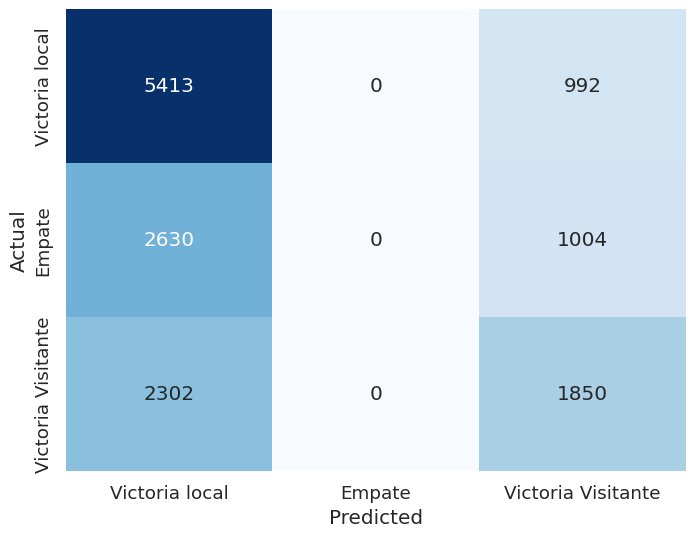

In [24]:
plot_confusion_matrix(cm, ["Victoria local", "Empate", "Victoria Visitante"], title="cm_sim1")

In [87]:
train_acc = [history.history['accuracy'][0] for history in history_list]
val_acc = [history.history['val_accuracy'][0] for history in history_list]

train_precision = [history.history['precision'][0] for history in history_list]
val_precision = [history.history['val_precision'][0] for history in history_list]

train_recall = [history.history['recall'][0] for history in history_list]
val_recall = [history.history['val_recall'][0] for history in history_list]

train_auc = [history.history['auc'][0] for history in history_list]
val_auc = [history.history['val_auc'][0] for history in history_list]

train_acc = np.array(train_acc)
val_acc = np.array(val_acc)
train_precision = np.array(train_precision)
val_precision = np.array(val_precision)
train_recall = np.array(train_recall)
val_recall = np.array(val_recall)
train_auc = np.array(train_auc)
val_auc = np.array(val_auc)

avg_train_acc = np.mean(train_acc)
avg_val_acc = np.mean(val_acc)
avg_train_precision = np.mean(train_precision)
avg_val_precision = np.mean(val_precision)
avg_train_recall = np.mean(train_recall)
avg_val_recall = np.mean(val_recall)
avg_train_auc = np.mean(train_auc)
avg_val_auc = np.mean(val_auc)

print(f"Average Training Accuracy: {avg_train_acc:.4f}")
print(f"Average Validation Accuracy: {avg_val_acc:.4f}")
print(f"Average Training Precision: {avg_train_precision:.4f}")
print(f"Average Validation Precision: {avg_val_precision:.4f}")
print(f"Average Training Recall: {avg_train_recall:.4f}")
print(f"Average Validation Recall: {avg_val_recall:.4f}")
print(f"Average Training AUC: {avg_train_auc:.4f}")
print(f"Average Validation AUC: {avg_val_auc:.4f}")

Average Training Accuracy: 0.5202
Average Validation Accuracy: 0.5131
Average Training Precision: 0.6347
Average Validation Precision: 0.5940
Average Training Recall: 0.2727
Average Validation Recall: 0.3501
Average Training AUC: 0.6934
Average Validation AUC: 0.6901


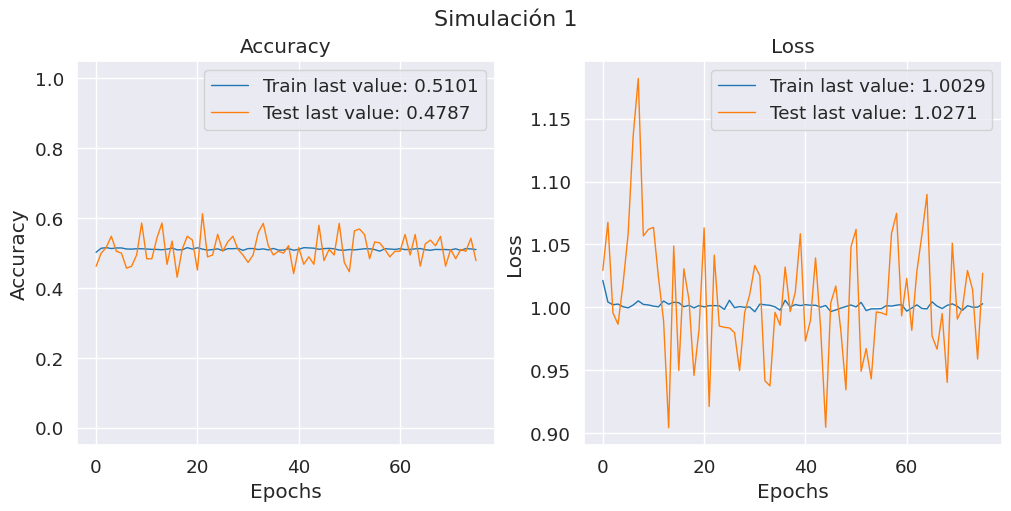

In [25]:
combined_history = {
    'accuracy': [],
    'val_accuracy': [],
    'loss': [],
    'val_loss': [],

}

for history in history_list:
    combined_history['accuracy'].extend(history.history['accuracy'])
    combined_history['val_accuracy'].extend(history.history['val_accuracy'])
    combined_history['loss'].extend(history.history['loss'])
    combined_history['val_loss'].extend(history.history['val_loss'])



# Crear un objeto History para pasar a `plot_history`
combined_history_obj = History()
combined_history_obj.history = combined_history

# Graficar utilizando `plot_history`
fig, ax = plot_history(combined_history_obj, path="plot.png")

# Añadir título a la figura
plt.suptitle('Simulación 1', fontsize=16)

# Mostrar la figura
plt.show()

## Aprendizaje Federado con 11 clientes (datos repartidos por ligas)

In [17]:

matches_by_country = {
    '0': matches[matches['country_id'] == 21518].sort_values(by=['year', 'stage']).reset_index(drop=True), #España
    '1': matches[matches['country_id'] == 1729].sort_values(by=['year', 'stage']).reset_index(drop=True), #Inglaterra
    '2': matches[matches['country_id'] == 10257].sort_values(by=['year', 'stage']).reset_index(drop=True), #Italia
    '3': matches[matches['country_id'] == 4769].sort_values(by=['year', 'stage']).reset_index(drop=True), #Francia
    '4': matches[matches['country_id'] == 7809].sort_values(by=['year', 'stage']).reset_index(drop=True), #Alemania
    '5': matches[matches['country_id'] == 1].sort_values(by=['year', 'stage']).reset_index(drop=True), #Belgica
    '6': matches[matches['country_id'] == 13274].sort_values(by=['year', 'stage']).reset_index(drop=True), #Holanda
    '7': matches[matches['country_id'] == 17642].sort_values(by=['year', 'stage']).reset_index(drop=True), #Portugal
    '8': matches[matches['country_id'] == 15722].sort_values(by=['year', 'stage']).reset_index(drop=True), #Polonia
    '9': matches[matches['country_id'] == 24558].sort_values(by=['year', 'stage']).reset_index(drop=True), #Suiza
    '10': matches[matches['country_id'] == 19694].sort_values(by=['year', 'stage']).reset_index(drop=True) #Escocia
}



cv_dict = {}
for country, data in matches_by_country.items():
    cv = YearStageCV(train_years=4, test_stages=2)
    cv_dict[country] = cv.split(data)


def get_data_for_round(country, round_num):
    try:
        train_index, test_index = cv_dict[country][round_num]
    except (KeyError, IndexError):
        # Si la ronda específica no está disponible o hay un IndexError, obtener la última ronda disponible
        train_index, test_index = cv_dict[country][-1]

    data = matches_by_country[country]
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]

    # Preprocesamiento: Separar características y etiquetas
    X_train = train_data.drop(columns=['RESULT'])
    y_train = to_categorical(train_data['RESULT'], num_classes=3)
    X_test = test_data.drop(columns=['RESULT'])
    y_test = to_categorical(test_data['RESULT'], num_classes=3)

    return X_train, y_train, X_test, y_test


Round: 1 Train years: [2008, 2009, 2010, 2011], Test year: 2012, Test stages: [1, 2], # train records: 1500, # test records: 20
Round: 2 Train years: [2008, 2009, 2010, 2011], Test year: 2012, Test stages: [3, 4], # train records: 1500, # test records: 20
Round: 3 Train years: [2008, 2009, 2010, 2011], Test year: 2012, Test stages: [5, 6], # train records: 1500, # test records: 20
Round: 4 Train years: [2008, 2009, 2010, 2011], Test year: 2012, Test stages: [7, 8], # train records: 1500, # test records: 20
Round: 5 Train years: [2008, 2009, 2010, 2011], Test year: 2012, Test stages: [9, 10], # train records: 1500, # test records: 20
Round: 6 Train years: [2008, 2009, 2010, 2011], Test year: 2012, Test stages: [11, 12], # train records: 1500, # test records: 20
Round: 7 Train years: [2008, 2009, 2010, 2011], Test year: 2012, Test stages: [13, 14], # train records: 1500, # test records: 20
Round: 8 Train years: [2008, 2009, 2010, 2011], Test year: 2012, Test stages: [15, 16], # train rec

In [16]:
X_train, y_train, X_test, y_test = get_data_for_round('5', 15)
X_test


,country_id,stage,year,PTS_5_PREV_L,PTS_5_PREV_V,DIF_PTS_5,CUOTA_L,CUOTA_E,CUOTA_V,L_VAL_MEDIA_POR,...,L_PTS,A_PTS,PTS_DIFF,HOME_ATTACK_STRENGTH,HOME_DEFENSE_STRENGTH,AWAY_ATTACK_STRENGTH,AWAY_DEFENSE_STRENGTH,xG_H,xG_A,xG_DIFF
1236,1,1,2013,4,6,-2,NaN,NaN,NaN,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1237,1,1,2013,7,0,7,NaN,NaN,NaN,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1238,1,2,2013,6,7,-1,NaN,NaN,NaN,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1239,1,2,2013,3,7,-4,NaN,NaN,NaN,66.0,...,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
cuotas_uniform_imputer = make_column_transformer(
    (SimpleImputer(strategy='constant', fill_value=3), [6,7,8]),
    remainder='passthrough',
    verbose_feature_names_out=False,
)
valores_uniform_imputer = make_column_transformer(
    (SimpleImputer(strategy='constant', fill_value=70), [9,10,11,12,13,14,15,16]),
    remainder='passthrough',
    verbose_feature_names_out=False,

)
normalizer = MinMaxScaler()

knn_imputer = make_column_transformer(
    (KNNImputer(n_neighbors=3), [6,7,8,9,10,11,12,13,14,15,16]),
    remainder='passthrough',
    verbose_feature_names_out=False,

)

In [15]:
def get_pipeline(country):
  if (country=='8' or country==8):
    pipeline_poland = make_pipeline(
      cuotas_uniform_imputer,
      valores_uniform_imputer,
      normalizer,
    )
    return pipeline_poland
  elif(country == '9' or country == 9):
    pipeline_switzerland = make_pipeline(
      cuotas_uniform_imputer,
      normalizer,
      knn_imputer,
    )
    return pipeline_switzerland
  else:
    pipeline_general = make_pipeline(
      normalizer,
      knn_imputer,
    )
    return pipeline_general



A continuación mediante la librería `Flower`, se creará el sistema federado para el entrenamiento del modelo de predicción de partidos de fútbol.

In [16]:
import flwr as fl
from typing import List, Tuple, Dict
from flwr.common import Metrics

# Función para obtener el cliente para cada liga
def get_client_fn(matches_by_country):
    def client_fn(cid: str):
        return LeagueClient(cid, matches_by_country[cid]).to_client()
    return client_fn

def weighted_average(metrics: List[Tuple[int, Metrics]]) -> Metrics:
    aggregated_metrics = {
        "accuracy_test": 0.0,
        "loss_test": 0.0
    }
    
    total_examples = 0

    y_true_all = []
    y_pred_all = []

    # Iterate through each client's metrics
    for num_examples, m in metrics:
        # Multiply each metric by the number of examples used
        for metric_name in ["accuracy_test", "loss_test"]:
            aggregated_metrics[metric_name] += num_examples * m.get(metric_name, 0.0)
        
        # Accumulate total number of examples
        total_examples += num_examples

        # Decode and extend y_true and y_pred
        y_true = json.loads(m["y_test"])
        y_pred = json.loads(m["y_pred"])
        
        y_true_all.extend(y_true)
        y_pred_all.extend(y_pred)
    
    # Calculate weighted averages for each metric
    if total_examples > 0:
        for metric_name in ["accuracy_test", "loss_test"]:
            aggregated_metrics[metric_name] /= total_examples

    # Add y_true_all and y_pred_all to the aggregated results
    aggregated_metrics["y_true"] = np.array(y_true_all)
    aggregated_metrics["y_pred"] = np.array(y_pred_all)
    
    return aggregated_metrics

def weighted_average_fit(metrics):
    """
    Compute a weighted average of the metrics from different clients.

    Args:
    - metrics (List[Tuple[int, Dict[str, float]]]): List of (num_examples, metrics) tuples.
      num_examples is the number of examples a client used in training.
      metrics is a dictionary of metric names to values.

    Returns:
    - Dict[str, float]: A dictionary containing the weighted average of each metric.
    """
    # Initialize a dictionary to accumulate the sums of the weighted metrics
    weighted_metrics = {}
    total_examples = sum([num_examples for num_examples, _ in metrics])
    # Sum up the weighted metrics
    for num_examples, client_metrics in metrics:
        for metric_name, metric_value in client_metrics.items():
            if metric_name not in weighted_metrics:
                weighted_metrics[metric_name] = 0.0
            weighted_metrics[metric_name] += metric_value * num_examples

    # Calculate the weighted average for each metric
    for metric_name in weighted_metrics:
        weighted_metrics[metric_name] /= total_examples

    return weighted_metrics


# Definición del cliente
class LeagueClient(fl.client.NumPyClient):
    def __init__(self, country, matches):
        self.country = country
        self.matches = matches
        self.input_dim = matches.drop(columns=['RESULT']).shape[1]
        self.model = get_model(self.input_dim)
        self.pipeline = get_pipeline(country)

    def get_parameters(self, config):
        return self.model.get_weights()

    def fit(self, parameters, config):
        self.model.set_weights(parameters)
        round_num = config["rnd"]  # Obtener el número de ronda desde la configuración
        X_train, y_train, _, _ = get_data_for_round(self.country, round_num-1)
        X_train = self.pipeline.fit_transform(X_train)
        history = self.model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0)
        accuracy_train = history.history['accuracy'][0]
        loss = history.history['loss'][0]
        return self.model.get_weights(), len(X_train), {"accuracy_train" : accuracy_train, "loss_train" : loss}

    def evaluate(self, parameters, config):
        self.model.set_weights(parameters)
        round_num = config["rnd"]  # Obtener el número de ronda desde la configuración
        if round_num == 75:
            model_save_path = f"modelo_ronda_{round_num}.keras"
            self.model.save(model_save_path)
            print(f"Modelo guardado en {model_save_path}")
        _, _, X_test, y_test = get_data_for_round(self.country, round_num-1)
        if self.country == '5' and (round_num-1) in [15, 16, 17]:
          self.pipeline = get_pipeline('8')
        X_test = self.pipeline.fit_transform(X_test)
        #print(f"EVALUANDO CLIENTE {self.country} EN LA RONDA {round_num}")
        loss, accuracy, _, _, _  = self.model.evaluate(X_test, y_test, verbose=0)
        y_pred = self.model.predict(X_test, verbose=0)
        y_pred = np.argmax(y_pred, axis=1)
        y_test_labels = np.argmax(y_test, axis=1)
        # Convertir a strings JSON
        y_test_str = json.dumps(y_test_labels.tolist())
        y_pred_str = json.dumps(y_pred.tolist())

        return loss, len(X_test), {
            "accuracy_test": float(accuracy), 
            "loss_test": float(loss),
            "y_test": y_test_str,
            "y_pred": y_pred_str
        }
     


In [20]:
def fit_config(rnd: int):
  """Return a configuration with the current round number."""
  config = {
      "rnd": rnd,
  }
  return config

def start_simulation():
    client_resources = {"num_cpus": 1, "num_gpus": 0} # Recursos de cada cliente


    # Crear la estrategia FedAvg con el parámetro on_fit_config_fn
    strategy = fl.server.strategy.FedAvg(
        fraction_fit=1.,
        fraction_evaluate=1.,
        min_fit_clients=len(matches_by_country),
        min_evaluate_clients=len(matches_by_country),
        min_available_clients=len(matches_by_country),
        on_fit_config_fn=fit_config,  # Usar la función de configuración aquí
        on_evaluate_config_fn = fit_config,
        evaluate_metrics_aggregation_fn = weighted_average,
        fit_metrics_aggregation_fn = weighted_average_fit,
    )


    history = fl.simulation.start_simulation(
        client_fn=get_client_fn(matches_by_country),
        num_clients=len(matches_by_country),
        config=fl.server.ServerConfig(num_rounds=76),
        strategy=strategy,
        client_resources=client_resources,
        ray_init_args={
        "num_cpus": 4, # Número de CPUs para inicializar Ray (cambiar según la máquina utilizada)
        "num_gpus": 0, # Número de GPUs para inicializar Ray (cambiar según la máquina utilizada)
        "_system_config": {"automatic_object_spilling_enabled": False},
    },
    )
    return history

if __name__ == "__main__":
    history = start_simulation()


INFO :      Starting Flower simulation, config: num_rounds=76, no round_timeout
2024-06-30 12:11:19,758	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'memory': 18009319835.0, 'object_store_memory': 9004659916.0, 'CPU': 4.0, 'node:172.19.2.2': 1.0, 'node:__internal_head__': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 4 actors
INFO :      [INIT]
INFO :      Requesting initial parameters from one random client
(pid=777) 2024-06-30 12:11:23.416340: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(pid=777) 2024-06-30 12:11:23.416422: E external/local_xla/xla/stream_e

(ClientAppActor pid=775) Modelo guardado en modelo_ronda_75.keras


(ClientAppActor pid=774) /opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead. [repeated 9x across cluster]
(ClientAppActor pid=774)   super().__init__(activity_regularizer=activity_regularizer, **kwargs) [repeated 9x across cluster]
(ClientAppActor pid=775) /opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead. [repeated 32x across cluster]
(ClientAppActor pid=775)   return lib.map_infer(values, mapper, convert=convert) [repeated 16x across cluster]
(ClientAppActor pid=775)   if is_sparse(pd_dtype): [repeated 16x across cluster]
(ClientAppActor pid=776) /opt/conda/lib/python3.10/site-packages/numpy/ma/extras.py:617: DeprecationWarni

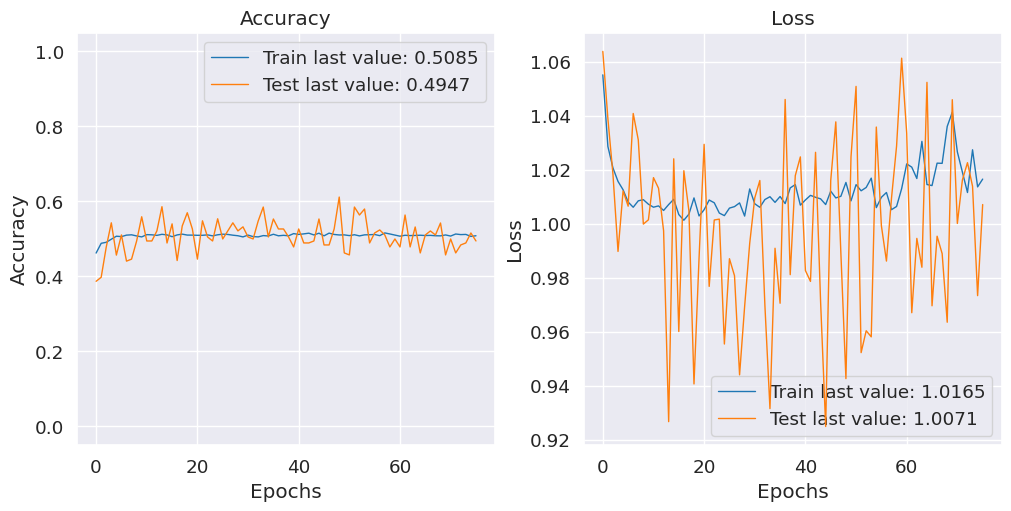

In [25]:
# Organizar los datos del historial en un formato compatible
history_data = {
    'accuracy': [acc[1] for acc in history.metrics_distributed_fit['accuracy_train']],
    'val_accuracy': [acc[1] for acc in history.metrics_distributed['accuracy_test']],
    'loss': [loss[1] for loss in history.metrics_distributed_fit['loss_train']],
    'val_loss': [loss[1] for loss in history.metrics_distributed['loss_test']],
                }

# Crear un objeto History para pasar a `plot_history`
combined_history_obj = History()
combined_history_obj.history = history_data


fig, ax = plot_history(combined_history_obj, path="plot_fl.png")

plt.show()

In [26]:

label_map = {0: 'Local', 1: 'Empate', 2: 'Visitante'}

history_data = {
    'y_pred': history.metrics_distributed['y_pred'],
    'y_true':  history.metrics_distributed['y_true'],
}

y_true_flat = [item for sublist in [acc[1].tolist() for acc in history_data['y_true']] for item in sublist]
y_pred_flat = [item for sublist in [acc[1].tolist() for acc in history_data['y_pred']] for item in sublist]

y_true_labels = [label_map[label] if isinstance(label, int) else label for label in y_true_flat]
y_pred_labels = [label_map[label] if isinstance(label, int) else label for label in y_pred_flat]

class_report = classification_report(
    y_true_labels, 
    y_pred_labels, 
    digits=2, 
    labels=['Local', 'Empate', 'Visitante'], 
    zero_division=0
)

print(class_report)

              precision    recall  f1-score   support

       Local       0.51      0.87      0.65      6405
      Empate       0.00      0.00      0.00      3634
   Visitante       0.49      0.40      0.44      4152

    accuracy                           0.51     14191
   macro avg       0.34      0.42      0.36     14191
weighted avg       0.38      0.51      0.42     14191



Matriz de confusión sin normalizar


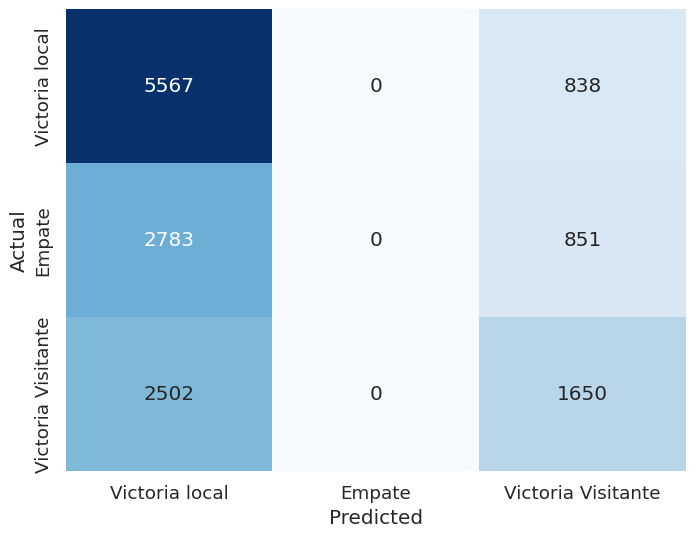

In [28]:
cm = confusion_matrix(np.array(y_true_labels), np.array(y_pred_labels), labels=["Local", "Empate", "Visitante"])
plot_confusion_matrix(cm, ["Victoria local", "Empate", "Victoria Visitante"], title="cm_sim2")

# 4. Comparación del rendimiento entre el entrenamiento local y el Aprendizaje Federado incorporando datos de múltiples clientes.

## Entrenamiento local en las 5 ligas más importantes de Europa (Big Five).

Paises:
- 0: España
- 1: Inglaterra
- 2: Italia
- 3: Francia
- 4: Alemania
- 5: Bélgica
- 6: Paises Bajos
- 7: Portugal
- 8: Polonia
- 9: Suiza
- 10: Escocia

### España

In [71]:
# Obtener el modelo y el pipeline general
model = get_model(matches_by_country['1'].drop(columns=['RESULT']).shape[1])
pipeline = get_pipeline('0')
history_list = []
all_y_pred_classes = []
all_y_true = []

for round in range(0, 76):
    # Obtener los datos de entrenamiento y validación para la ronda actual
    X_train, y_train, X_test, y_test = get_data_for_round('0', round)


    # Aplicar el pipeline de preprocesamiento
    X_train = pipeline.fit_transform(X_train)
    X_test = pipeline.transform(X_test)  # Usar transform en lugar de fit_transform para consistencia
    
    # Entrenar el modelo con los pesos de las clases
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=2, validation_data=(X_test, y_test))
    history_list.append(history)
    
    # Obtener predicciones en datos de validación (X_test)
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir a etiquetas de clases
    y_true = np.argmax(y_test, axis=1)          # Convertir a etiquetas de clases

    # Acumular predicciones y etiquetas verdaderas
    all_y_pred_classes.extend(y_pred_classes)
    all_y_true.extend(y_true)

# Convertir listas a numpy arrays
all_y_pred_classes = np.array(all_y_pred_classes)
all_y_true = np.array(all_y_true)

# Calcular la matriz de confusión final
cm = confusion_matrix(all_y_true, all_y_pred_classes)


47/47 - 15s - 309ms/step - accuracy: 0.3253 - auc: 0.4915 - loss: 1.1101 - precision: 0.6667 - recall: 0.0013 - val_accuracy: 0.3500 - val_auc: 0.5006 - val_loss: 1.1000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
47/47 - 0s - 4ms/step - accuracy: 0.4527 - auc: 0.6204 - loss: 1.0637 - precision: 0.5357 - recall: 0.0200 - val_accuracy: 0.5500 - val_auc: 0.7556 - val_loss: 1.0072 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
47/47 - 0s - 4ms/step - accuracy: 0.4987 - auc: 0.6387 - loss: 1.0458 - precision: 0.5471 - recall: 0.1007 - val_accuracy: 0.7500 - val_auc: 0.8144 - val_loss: 0.9082 - val_precision: 1.0000 - val_recall: 0.0500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
47/47 - 0s - 4ms/step - accuracy: 0.5007 - auc: 0.6535 - loss: 1.0310 - precision: 0.5959 - recall: 0.1740 - val_accuracy: 0.5500 - val_auc: 0.6950 - val_loss: 1.0023 - val_precision: 0.7500 - val_recall: 0.1500
1/1 ━━━━━━━━━━━━━━

Matriz de confusión sin normalizar


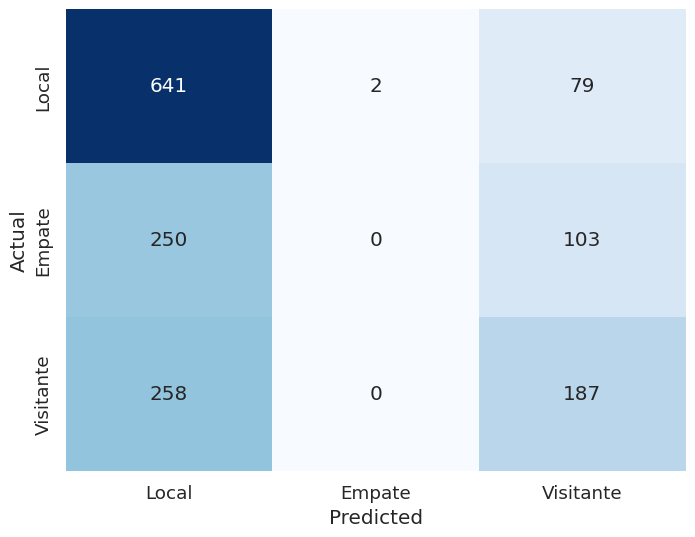

In [72]:
plot_confusion_matrix(cm, classes=['Local', 'Empate', 'Visitante'] ,title='cm_españa' )

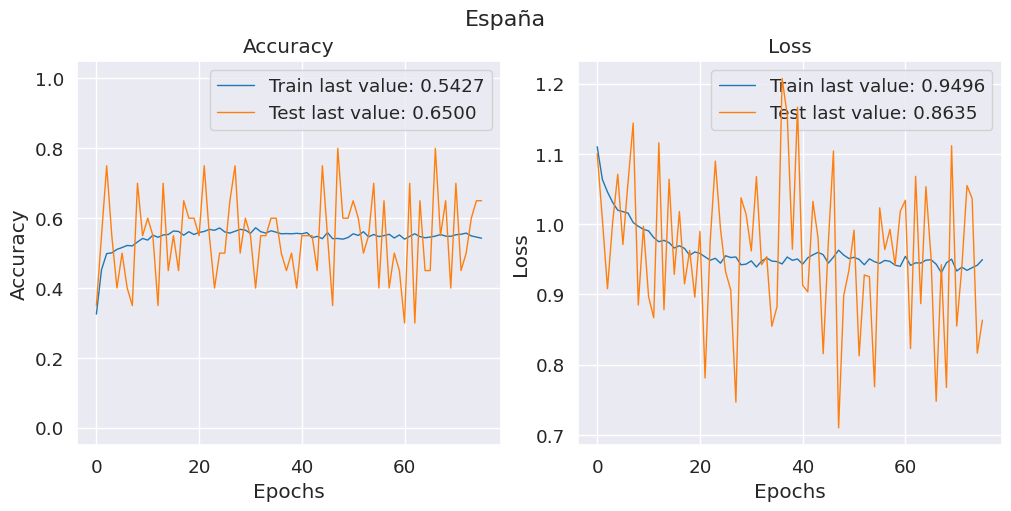

In [73]:
combined_history = {
    'accuracy': [],
    'val_accuracy': [],
    'loss': [],
    'val_loss': [],

}

for history in history_list:
    combined_history['accuracy'].extend(history.history['accuracy'])
    combined_history['val_accuracy'].extend(history.history['val_accuracy'])
    combined_history['loss'].extend(history.history['loss'])
    combined_history['val_loss'].extend(history.history['val_loss'])


combined_history_obj = History()
combined_history_obj.history = combined_history

fig, ax = plot_history(combined_history_obj, path="plot_españa.png")

plt.suptitle('España', fontsize=16)

plt.show()

In [74]:

label_map = {0: 'Local', 1: 'Empate', 2: 'Visitante'}

y_true_labels = [label_map[label]  for label in all_y_true]
y_pred_labels = [label_map[label]  for label in all_y_pred_classes]

class_report = classification_report(
    y_true_labels, 
    y_pred_labels,
    digits=2, 
    labels=['Local', 'Empate', 'Visitante'], 
    zero_division=0
)

print(class_report)

              precision    recall  f1-score   support

       Local       0.56      0.89      0.69       722
      Empate       0.00      0.00      0.00       353
   Visitante       0.51      0.42      0.46       445

    accuracy                           0.54      1520
   macro avg       0.35      0.44      0.38      1520
weighted avg       0.41      0.54      0.46      1520



### Inglaterra

In [75]:

# Obtener el modelo y el pipeline general
model = get_model(matches_by_country['1'].drop(columns=['RESULT']).shape[1])
pipeline = get_pipeline('1')
history_list = []
all_y_pred_classes = []
all_y_true = []

for round in range(0, 76):
    # Obtener los datos de entrenamiento y validación para la ronda actual
    X_train, y_train, X_test, y_test = get_data_for_round('1', round)


    # Aplicar el pipeline de preprocesamiento
    X_train = pipeline.fit_transform(X_train)
    X_test = pipeline.transform(X_test)  # Usar transform en lugar de fit_transform para consistencia
    
    # Entrenar el modelo con los pesos de las clases
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=2, validation_data=(X_test, y_test))
    history_list.append(history)
    
    # Obtener predicciones en datos de validación (X_test)
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir a etiquetas de clases
    y_true = np.argmax(y_test, axis=1)          # Convertir a etiquetas de clases

    # Acumular predicciones y etiquetas verdaderas
    all_y_pred_classes.extend(y_pred_classes)
    all_y_true.extend(y_true)

# Convertir listas a numpy arrays
all_y_pred_classes = np.array(all_y_pred_classes)
all_y_true = np.array(all_y_true)

# Calcular la matriz de confusión final
cm = confusion_matrix(all_y_true, all_y_pred_classes)


47/47 - 14s - 297ms/step - accuracy: 0.3353 - auc: 0.5115 - loss: 1.1112 - precision: 0.1304 - recall: 0.0020 - val_accuracy: 0.3000 - val_auc: 0.5706 - val_loss: 1.0739 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
47/47 - 0s - 4ms/step - accuracy: 0.4220 - auc: 0.5945 - loss: 1.0772 - precision: 0.5000 - recall: 0.0100 - val_accuracy: 0.4000 - val_auc: 0.7000 - val_loss: 1.0551 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
47/47 - 0s - 4ms/step - accuracy: 0.4473 - auc: 0.6091 - loss: 1.0661 - precision: 0.5699 - recall: 0.0353 - val_accuracy: 0.4000 - val_auc: 0.5794 - val_loss: 1.0835 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
47/47 - 0s - 4ms/step - accuracy: 0.4700 - auc: 0.6235 - loss: 1.0553 - precision: 0.5841 - recall: 0.0880 - val_accuracy: 0.5000 - val_auc: 0.6981 - val_loss: 1.0285 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
1/

Matriz de confusión sin normalizar


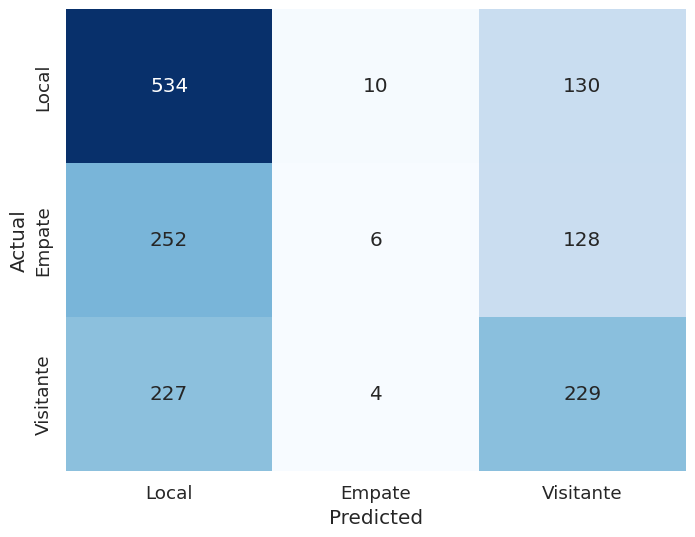

In [76]:
plot_confusion_matrix(cm, classes=['Local', 'Empate', 'Visitante'] ,title='cm_inglaterra' )

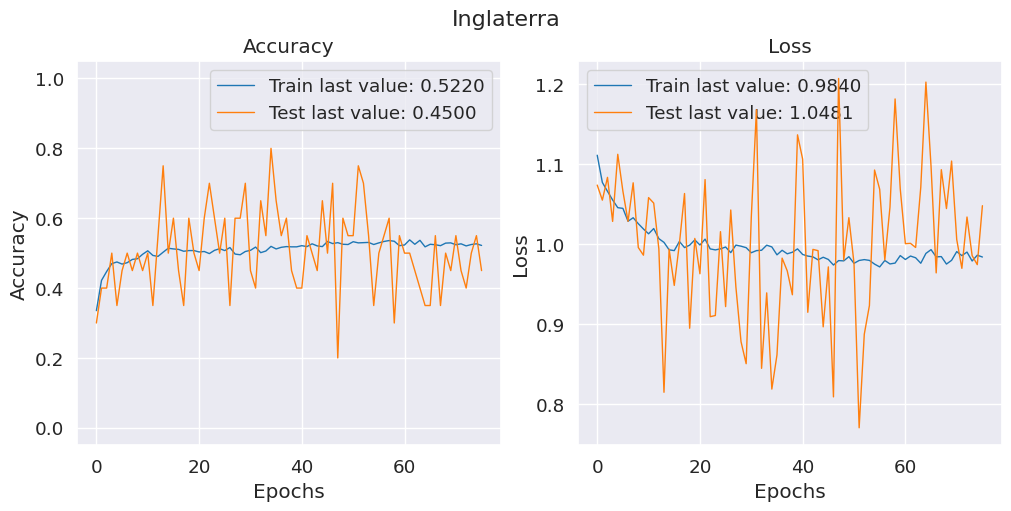

In [77]:
combined_history = {
    'accuracy': [],
    'val_accuracy': [],
    'loss': [],
    'val_loss': [],

}

for history in history_list:
    combined_history['accuracy'].extend(history.history['accuracy'])
    combined_history['val_accuracy'].extend(history.history['val_accuracy'])
    combined_history['loss'].extend(history.history['loss'])
    combined_history['val_loss'].extend(history.history['val_loss'])



combined_history_obj = History()
combined_history_obj.history = combined_history

fig, ax = plot_history(combined_history_obj, path="plot_inglaterra.png")

plt.suptitle('Inglaterra', fontsize=16)

plt.show()

In [79]:

label_map = {0: 'Local', 1: 'Empate', 2: 'Visitante'}

y_true_labels = [label_map[label]  for label in all_y_true]
y_pred_labels = [label_map[label]  for label in all_y_pred_classes]


class_report = classification_report(
    y_true_labels, 
    y_pred_labels,
    digits=2, 
    labels=['Local', 'Empate', 'Visitante'], 
    zero_division=0
)

print(class_report)

              precision    recall  f1-score   support

       Local       0.53      0.79      0.63       674
      Empate       0.30      0.02      0.03       386
   Visitante       0.47      0.50      0.48       460

    accuracy                           0.51      1520
   macro avg       0.43      0.44      0.38      1520
weighted avg       0.45      0.51      0.43      1520



### Italia

In [80]:
# Obtener el modelo y el pipeline general
model = get_model(matches_by_country['2'].drop(columns=['RESULT']).shape[1])
pipeline = get_pipeline('2')
history_list = []
all_y_pred_classes = []
all_y_true = []

for round in range(0, 76):
    # Obtener los datos de entrenamiento y validación para la ronda actual
    X_train, y_train, X_test, y_test = get_data_for_round('2', round)


    # Aplicar el pipeline de preprocesamiento
    X_train = pipeline.fit_transform(X_train)
    X_test = pipeline.transform(X_test)  # Usar transform en lugar de fit_transform para consistencia
    
    # Entrenar el modelo con los pesos de las clases
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=2, validation_data=(X_test, y_test))
    history_list.append(history)
    
    # Obtener predicciones en datos de validación (X_test)
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir a etiquetas de clases
    y_true = np.argmax(y_test, axis=1)          # Convertir a etiquetas de clases

    # Acumular predicciones y etiquetas verdaderas
    all_y_pred_classes.extend(y_pred_classes)
    all_y_true.extend(y_true)

# Convertir listas a numpy arrays
all_y_pred_classes = np.array(all_y_pred_classes)
all_y_true = np.array(all_y_true)

# Calcular la matriz de confusión final
cm = confusion_matrix(all_y_true, all_y_pred_classes)

47/47 - 11s - 239ms/step - accuracy: 0.3931 - auc: 0.5574 - loss: 1.0900 - precision: 1.0000 - recall: 6.7659e-04 - val_accuracy: 0.5000 - val_auc: 0.5775 - val_loss: 1.0992 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
47/47 - 0s - 4ms/step - accuracy: 0.4668 - auc: 0.6289 - loss: 1.0574 - precision: 0.4516 - recall: 0.0095 - val_accuracy: 0.2500 - val_auc: 0.3925 - val_loss: 1.1714 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
47/47 - 0s - 4ms/step - accuracy: 0.4770 - auc: 0.6267 - loss: 1.0562 - precision: 0.5427 - recall: 0.0602 - val_accuracy: 0.5000 - val_auc: 0.7125 - val_loss: 1.0180 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
47/47 - 0s - 4ms/step - accuracy: 0.4702 - auc: 0.6290 - loss: 1.0508 - precision: 0.5589 - recall: 0.0995 - val_accuracy: 0.6000 - val_auc: 0.7481 - val_loss: 0.9778 - val_precision: 1.0000 - val_recall: 0.0500
1/1 ━━

Matriz de confusión sin normalizar


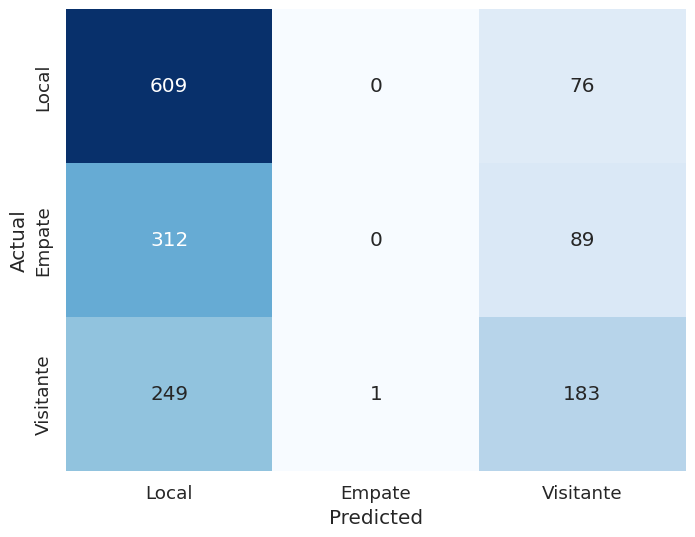

In [81]:
plot_confusion_matrix(cm, classes=['Local', 'Empate', 'Visitante'] ,title='cm_italia' )

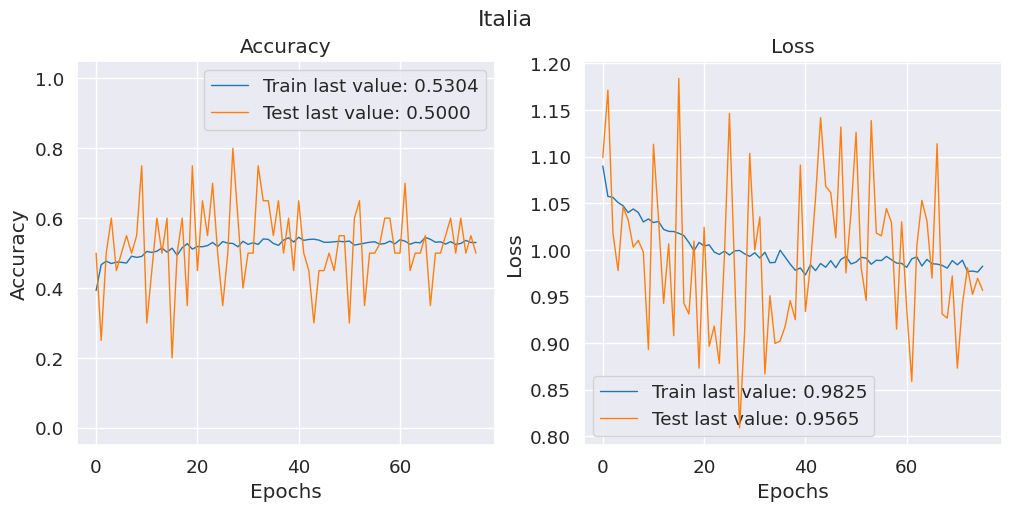

In [82]:
combined_history = {
    'accuracy': [],
    'val_accuracy': [],
    'loss': [],
    'val_loss': [],

}

for history in history_list:
    combined_history['accuracy'].extend(history.history['accuracy'])
    combined_history['val_accuracy'].extend(history.history['val_accuracy'])
    combined_history['loss'].extend(history.history['loss'])
    combined_history['val_loss'].extend(history.history['val_loss'])



combined_history_obj = History()
combined_history_obj.history = combined_history

fig, ax = plot_history(combined_history_obj, path="plot_italia.png")

plt.suptitle('Italia', fontsize=16)

plt.show()

In [83]:

label_map = {0: 'Local', 1: 'Empate', 2: 'Visitante'}

y_true_labels = [label_map[label]  for label in all_y_true]
y_pred_labels = [label_map[label]  for label in all_y_pred_classes]

class_report = classification_report(
    y_true_labels, 
    y_pred_labels,
    digits=2, 
    labels=['Local', 'Empate', 'Visitante'], 
    zero_division=0
)

print(class_report)

              precision    recall  f1-score   support

       Local       0.52      0.89      0.66       685
      Empate       0.00      0.00      0.00       401
   Visitante       0.53      0.42      0.47       433

    accuracy                           0.52      1519
   macro avg       0.35      0.44      0.38      1519
weighted avg       0.38      0.52      0.43      1519



### Francia

In [84]:
# Obtener el modelo y el pipeline general
model = get_model(matches_by_country['3'].drop(columns=['RESULT']).shape[1])
pipeline = get_pipeline('3')
history_list = []
all_y_pred_classes = []
all_y_true = []

for round in range(0, 76):
    # Obtener los datos de entrenamiento y validación para la ronda actual
    X_train, y_train, X_test, y_test = get_data_for_round('3', round)


    # Aplicar el pipeline de preprocesamiento
    X_train = pipeline.fit_transform(X_train)
    X_test = pipeline.transform(X_test)  # Usar transform en lugar de fit_transform para consistencia
    
    # Entrenar el modelo con los pesos de las clases
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=2, validation_data=(X_test, y_test))
    history_list.append(history)
    
    # Obtener predicciones en datos de validación (X_test)
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir a etiquetas de clases
    y_true = np.argmax(y_test, axis=1)          # Convertir a etiquetas de clases

    # Acumular predicciones y etiquetas verdaderas
    all_y_pred_classes.extend(y_pred_classes)
    all_y_true.extend(y_true)

# Convertir listas a numpy arrays
all_y_pred_classes = np.array(all_y_pred_classes)
all_y_true = np.array(all_y_true)

# Calcular la matriz de confusión final
cm = confusion_matrix(all_y_true, all_y_pred_classes)

47/47 - 15s - 318ms/step - accuracy: 0.4327 - auc: 0.5924 - loss: 1.0747 - precision: 0.5000 - recall: 0.0500 - val_accuracy: 0.4000 - val_auc: 0.5725 - val_loss: 1.0850 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
47/47 - 0s - 4ms/step - accuracy: 0.4340 - auc: 0.5946 - loss: 1.0725 - precision: 0.5704 - recall: 0.0540 - val_accuracy: 0.4500 - val_auc: 0.5869 - val_loss: 1.0765 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
47/47 - 0s - 4ms/step - accuracy: 0.4447 - auc: 0.6037 - loss: 1.0673 - precision: 0.5134 - recall: 0.0640 - val_accuracy: 0.4500 - val_auc: 0.6263 - val_loss: 1.0585 - val_precision: 1.0000 - val_recall: 0.0500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
47/47 - 0s - 4ms/step - accuracy: 0.4427 - auc: 0.6082 - loss: 1.0643 - precision: 0.5714 - recall: 0.0693 - val_accuracy: 0.4000 - val_auc: 0.6094 - val_loss: 1.0653 - val_precision: 1.0000 - val_recall: 0.0500
1/1 ━━━━━━━━━━━━━━

Matriz de confusión sin normalizar


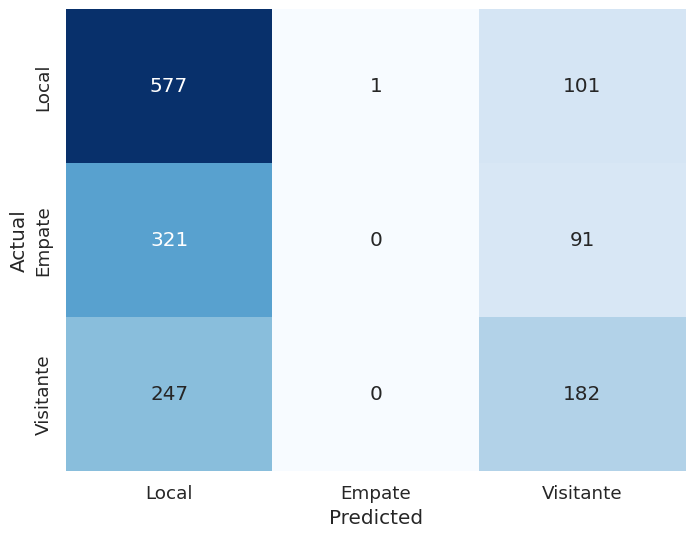

In [85]:
plot_confusion_matrix(cm, classes=['Local', 'Empate', 'Visitante'] ,title='cm_francia' )

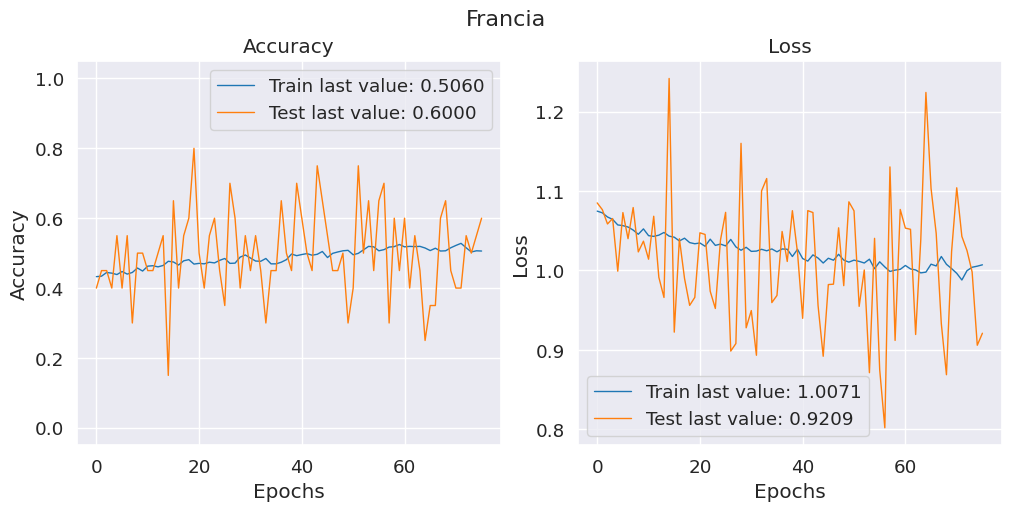

In [86]:
combined_history = {
    'accuracy': [],
    'val_accuracy': [],
    'loss': [],
    'val_loss': [],

}

for history in history_list:
    combined_history['accuracy'].extend(history.history['accuracy'])
    combined_history['val_accuracy'].extend(history.history['val_accuracy'])
    combined_history['loss'].extend(history.history['loss'])
    combined_history['val_loss'].extend(history.history['val_loss'])



combined_history_obj = History()
combined_history_obj.history = combined_history

fig, ax = plot_history(combined_history_obj, path="plot_francia.png")

plt.suptitle('Francia', fontsize=16)

plt.show()

In [87]:

label_map = {0: 'Local', 1: 'Empate', 2: 'Visitante'}

y_true_labels = [label_map[label]  for label in all_y_true]
y_pred_labels = [label_map[label]  for label in all_y_pred_classes]

class_report = classification_report(
    y_true_labels, 
    y_pred_labels,
    digits=2, 
    labels=['Local', 'Empate', 'Visitante'], 
    zero_division=0
)

print(class_report)

              precision    recall  f1-score   support

       Local       0.50      0.85      0.63       679
      Empate       0.00      0.00      0.00       412
   Visitante       0.49      0.42      0.45       429

    accuracy                           0.50      1520
   macro avg       0.33      0.42      0.36      1520
weighted avg       0.36      0.50      0.41      1520



### Alemania

In [26]:
# Obtener el modelo y el pipeline general
model = get_model(matches_by_country['4'].drop(columns=['RESULT']).shape[1])
pipeline = get_pipeline('4')
history_list = []
all_y_pred_classes = []
all_y_true = []

for round in range(0, 68):
    # Obtener los datos de entrenamiento y validación para la ronda actual
    X_train, y_train, X_test, y_test = get_data_for_round('4', round)
    # Aplicar el pipeline de preprocesamiento
    X_train = pipeline.fit_transform(X_train)
    X_test = pipeline.transform(X_test)  # Usar transform en lugar de fit_transform para consistencia
    
    # Entrenar el modelo con los pesos de las clases
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=2, validation_data=(X_test, y_test))
    history_list.append(history)
    
    # Obtener predicciones en datos de validación (X_test)
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir a etiquetas de clases
    y_true = np.argmax(y_test, axis=1)          # Convertir a etiquetas de clases

    # Acumular predicciones y etiquetas verdaderas
    all_y_pred_classes.extend(y_pred_classes)
    all_y_true.extend(y_true)

# Convertir listas a numpy arrays
all_y_pred_classes = np.array(all_y_pred_classes)
all_y_true = np.array(all_y_true)

# Calcular la matriz de confusión final
cm = confusion_matrix(all_y_true, all_y_pred_classes)

38/38 - 15s - 391ms/step - accuracy: 0.4486 - auc: 0.6152 - loss: 1.0706 - precision: 0.5023 - recall: 0.1783 - val_accuracy: 0.4444 - val_auc: 0.6937 - val_loss: 1.0502 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
38/38 - 0s - 4ms/step - accuracy: 0.4735 - auc: 0.6444 - loss: 1.0406 - precision: 0.5945 - recall: 0.1799 - val_accuracy: 0.3889 - val_auc: 0.5440 - val_loss: 1.0794 - val_precision: 1.0000 - val_recall: 0.0556
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
38/38 - 0s - 4ms/step - accuracy: 0.4743 - auc: 0.6424 - loss: 1.0431 - precision: 0.5908 - recall: 0.1915 - val_accuracy: 0.4444 - val_auc: 0.7415 - val_loss: 0.9549 - val_precision: 1.0000 - val_recall: 0.2778
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
38/38 - 0s - 4ms/step - accuracy: 0.4585 - auc: 0.6394 - loss: 1.0413 - precision: 0.6256 - recall: 0.1177 - val_accuracy: 0.5000 - val_auc: 0.6404 - val_loss: 1.0135 - val_precision: 0.4286 - val_recall: 0.1667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

Matriz de confusión sin normalizar


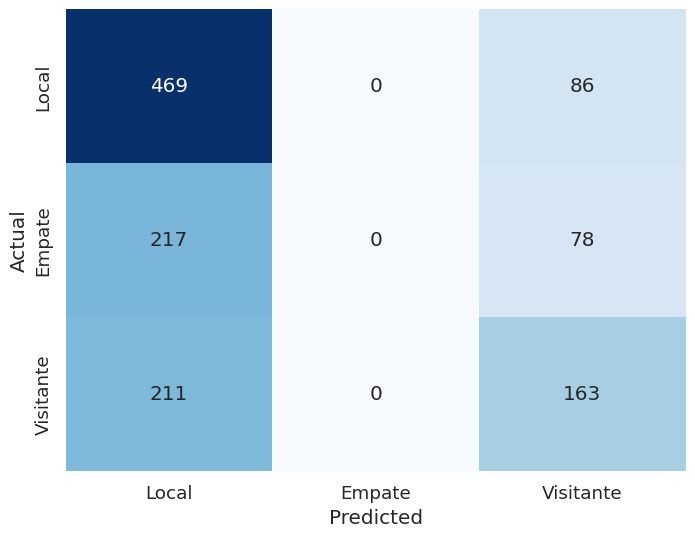

In [27]:
plot_confusion_matrix(cm, classes=['Local', 'Empate', 'Visitante'] ,title='cm_alemania' )

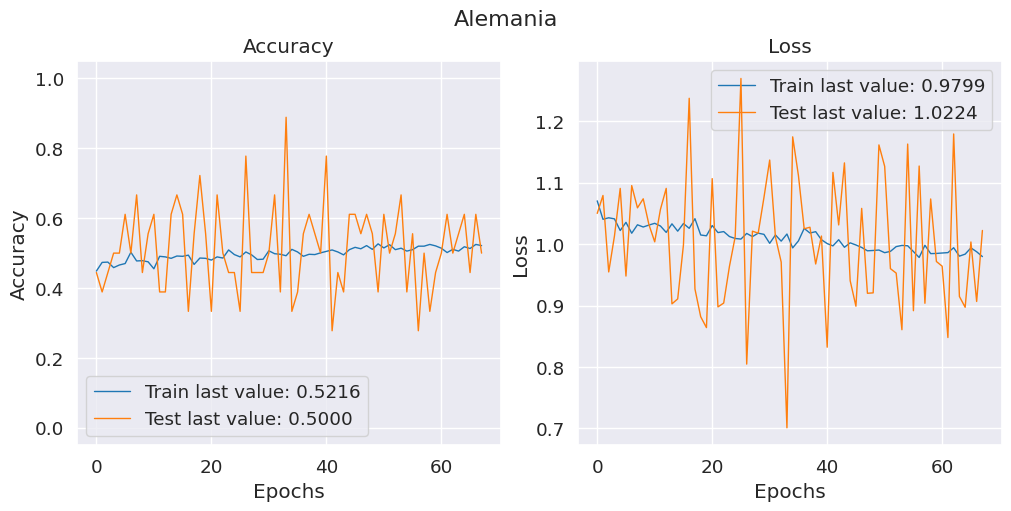

In [28]:
combined_history = {
    'accuracy': [],
    'val_accuracy': [],
    'loss': [],
    'val_loss': [],

}

for history in history_list:
    combined_history['accuracy'].extend(history.history['accuracy'])
    combined_history['val_accuracy'].extend(history.history['val_accuracy'])
    combined_history['loss'].extend(history.history['loss'])
    combined_history['val_loss'].extend(history.history['val_loss'])



combined_history_obj = History()
combined_history_obj.history = combined_history

fig, ax = plot_history(combined_history_obj, path="plot_alemania.png")

plt.suptitle('Alemania', fontsize=16)

plt.show()

In [29]:
label_map = {0: 'Local', 1: 'Empate', 2: 'Visitante'}

y_true_labels = [label_map[label]  for label in all_y_true]
y_pred_labels = [label_map[label]  for label in all_y_pred_classes]

class_report = classification_report(
    y_true_labels, 
    y_pred_labels,
    digits=2, 
    labels=['Local', 'Empate', 'Visitante'], 
    zero_division=0
)

print(class_report)

              precision    recall  f1-score   support

       Local       0.52      0.85      0.65       555
      Empate       0.00      0.00      0.00       295
   Visitante       0.50      0.44      0.47       374

    accuracy                           0.52      1224
   macro avg       0.34      0.43      0.37      1224
weighted avg       0.39      0.52      0.44      1224



## Aprendizaje Federado evaluado desde los clientes con las 5 ligas más importantes.

In [29]:
# Función para obtener el cliente para cada liga
def get_client_fn(matches_by_country):
    def client_fn(cid: str):
        return LeagueClient(cid, matches_by_country[cid]).to_client()
    return client_fn


# Definición del cliente
class LeagueClient(fl.client.NumPyClient):
    def __init__(self, country, matches):
        self.country = country
        self.matches = matches
        self.input_dim = matches.drop(columns=['RESULT']).shape[1]
        self.model = get_model(self.input_dim)
        self.pipeline = get_pipeline(country)

    def get_parameters(self, config):
        return self.model.get_weights()

    def fit(self, parameters, config):
        self.model.set_weights(parameters)
        round_num = config["rnd"]  # Obtener el número de ronda desde la configuración
        X_train, y_train, _, _ = get_data_for_round(self.country, round_num-1)
        X_train = self.pipeline.fit_transform(X_train)
        history = self.model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0)
        accuracy_train = history.history['accuracy'][0]
        loss = history.history['loss'][0]
        # Convertir self.country a entero
        country_id = int(self.country)
        # Prefijo con el identificador del país
        prefixed_metrics = {
            f"accuracy_train_{country_id}": accuracy_train,
            f"loss_train_{country_id}": loss
        }
        return self.model.get_weights(), len(X_train), prefixed_metrics

    def evaluate(self, parameters, config):
        self.model.set_weights(parameters)
        round_num = config["rnd"]  # Obtener el número de ronda desde la configuración
        if round_num == 75:
            model_save_path = f"modelo_ronda_{round_num}.keras"
            self.model.save(model_save_path)
            print(f"Modelo guardado en {model_save_path}")
        _, _, X_test, y_test = get_data_for_round(self.country, round_num-1)
        if self.country == '5' and (round_num-1) in [15, 16, 17]:
            self.pipeline = get_pipeline('8')
        X_test = self.pipeline.fit_transform(X_test)
        # Evaluar el modelo para este país
        loss, accuracy, _, _, _ = self.model.evaluate(X_test, y_test, verbose=0)
        y_pred = self.model.predict(X_test, verbose=0)
        y_pred = np.argmax(y_pred, axis=1)
        y_test_labels = np.argmax(y_test, axis=1)
        # Convertir a strings JSON
        y_test_str = json.dumps(y_test_labels.tolist())
        y_pred_str = json.dumps(y_pred.tolist())
        # Convertir self.country a entero
        country_id = int(self.country)
        # Prefijo con el identificador del país
        prefixed_metrics = {
            f"accuracy_test_{country_id}": float(accuracy),
            f"loss_test_{country_id}": float(loss),
            f"y_test_{country_id}": y_test_str,
            f"y_pred_{country_id}": y_pred_str
        }
        return loss, len(X_test), prefixed_metrics

In [31]:
import flwr as fl
from typing import List, Tuple, Dict
from flwr.common import Metrics

def fit_config(rnd: int):
  """Return a configuration with the current round number."""
  config = {
      "rnd": rnd,
  }
  return config


def weighted_average(metrics: List[Tuple[int, Metrics]]) -> Dict[str, Metrics]:
    """
    Compute and return individual metrics for each client that end with 0, 1, 2, 3, or 4.

    Args:
    - metrics (List[Tuple[int, Metrics]]): List of (num_examples, metrics) tuples.

    Returns:
    - Dict[str, Metrics]: A dictionary containing individual metrics for each client.
    """
    individual_metrics = {}

    for _, m in metrics:
        for key, value in m.items():
            # Extract the suffix which is the last character of the metric name
            suffix = key.split('_')[-1]
            # Check if the suffix is one of the specified digits
            if suffix in '01234':
                if suffix not in individual_metrics:
                    individual_metrics[key] = {}
                if key not in ["y_test", "y_pred"]:
                    individual_metrics[key] = value
        
        # Add y_true and y_pred as numpy arrays if available
        if any(k.endswith(f"_{suffix}") for suffix in '01234' for k in m):
            if "y_test" in m and f"y_test_{suffix}" in m:
                individual_metrics["y_true"] = np.array(json.loads(m[f"y_test_{suffix}"]))
            if "y_pred" in m and f"y_pred_{suffix}" in m:
                individual_metrics["y_pred"] = np.array(json.loads(m[f"y_pred_{suffix}"]))

    return individual_metrics

def weighted_average_fit(metrics: List[Tuple[int, Metrics]]) -> List[Metrics]:
    """
    Compute and return individual training metrics for each client that end with 0, 1, 2, 3, or 4.

    Args:
    - metrics (List[Tuple[int, Metrics]]): List of (num_examples, metrics) tuples.

    Returns:
    - List[Metrics]: A list of dictionaries containing individual training metrics for each client.
    """
    individual_metrics = {}

    for _, m in metrics:
        for key, value in m.items():
            # Extract the suffix which is the last character of the metric name
            suffix = key.split('_')[-1]
            # Check if the suffix is one of the specified digits
            if suffix in '01234':
                if suffix not in individual_metrics:
                    individual_metrics[key] = {}
                individual_metrics[key] = value

    return individual_metrics

def start_simulation():
    client_resources = {"num_cpus": 1, "num_gpus": 0}


    # Crear la estrategia FedAvg con el parámetro on_fit_config_fn
    strategy = fl.server.strategy.FedAvg(
        fraction_fit=1.,
        fraction_evaluate=1.,
        min_fit_clients=len(matches_by_country),
        min_evaluate_clients=len(matches_by_country),
        min_available_clients=len(matches_by_country),
        on_fit_config_fn=fit_config,  # Usar la función de configuración aquí
        on_evaluate_config_fn = fit_config,
        evaluate_metrics_aggregation_fn = weighted_average,
        fit_metrics_aggregation_fn = weighted_average_fit,
    )


    history = fl.simulation.start_simulation(
        client_fn=get_client_fn(matches_by_country),
        num_clients=len(matches_by_country),
        config=fl.server.ServerConfig(num_rounds=76),
        strategy=strategy,
        client_resources=client_resources,
        ray_init_args={
        "num_cpus": 4, # Número de CPUs para inicializar Ray (cambiar según la máquina utilizada)
        "num_gpus": 0, # Número de GPUs para inicializar Ray (cambiar según la máquina utilizada)
        "_system_config": {"automatic_object_spilling_enabled": False},
    },
    )
    return history

if __name__ == "__main__":
    history = start_simulation()
    


INFO :      Starting Flower simulation, config: num_rounds=76, no round_timeout
(pid=24310) 2024-06-30 12:45:03.382047: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered [repeated 3x across cluster]
(pid=24310) 2024-06-30 12:45:03.382088: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered [repeated 3x across cluster]
(pid=24310) 2024-06-30 12:45:03.383880: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered [repeated 3x across cluster]
2024-06-30 12:45:12,413	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'node:__internal_head__': 1.

(ClientAppActor pid=24666) Modelo guardado en modelo_ronda_75.keras


(ClientAppActor pid=24677) /opt/conda/lib/python3.10/site-packages/numpy/ma/extras.py:617: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
(ClientAppActor pid=24677)   scl = avg.dtype.type(a.count(axis))
INFO :      aggregate_evaluate: received 11 results and 0 failures
INFO :      
INFO :      [ROUND 76]
INFO :      configure_fit: strategy sampled 11 clients (out of 11)
(ClientAppActor pid=24677) /opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead. [repeated 11x across cluster]
(ClientAppActor pid=24677)   super().__init__(activity_regularizer=activity_regularizer, **kwargs) [repeated 11x across cluster]
(ClientA

### España

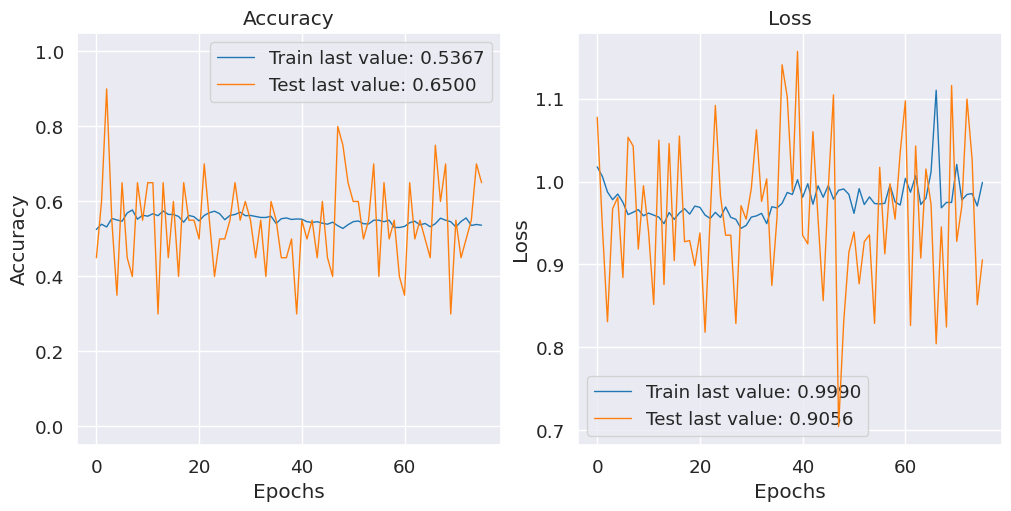

In [32]:

history_data = {
    'accuracy': [acc[1] for acc in history.metrics_distributed_fit['accuracy_train_0']],
    'val_accuracy': [acc[1] for acc in history.metrics_distributed['accuracy_test_0']],
    'loss': [loss[1] for loss in history.metrics_distributed_fit['loss_train_0']],
    'val_loss': [loss[1] for loss in history.metrics_distributed['loss_test_0']],
                }


combined_history_obj = History()
combined_history_obj.history = history_data


fig, ax = plot_history(combined_history_obj, path="plot_fl_españa.png")


plt.show()

In [33]:
label_map = {0: 'Local', 1: 'Empate', 2: 'Visitante'}

history_data = {
    'y_pred': history.metrics_distributed['y_pred_0'],
    'y_true':  history.metrics_distributed['y_test_0'],
}

y_true_flat = [item for sublist in [eval(acc[1]) for acc in history_data['y_true']] for item in sublist]
y_pred_flat = [item for sublist in [eval(acc[1]) for acc in history_data['y_pred']] for item in sublist]

y_true_labels = [label_map[label] if isinstance(label, int) else label for label in y_true_flat]
y_pred_labels = [label_map[label] if isinstance(label, int) else label for label in y_pred_flat]

class_report = classification_report(
    y_true_labels, 
    y_pred_labels, 
    digits=2, 
    labels=['Local', 'Empate', 'Visitante'], 
    zero_division=0
)

print(class_report)

              precision    recall  f1-score   support

       Local       0.55      0.91      0.68       722
      Empate       0.00      0.00      0.00       353
   Visitante       0.53      0.38      0.44       445

    accuracy                           0.54      1520
   macro avg       0.36      0.43      0.37      1520
weighted avg       0.41      0.54      0.45      1520



Matriz de confusión sin normalizar


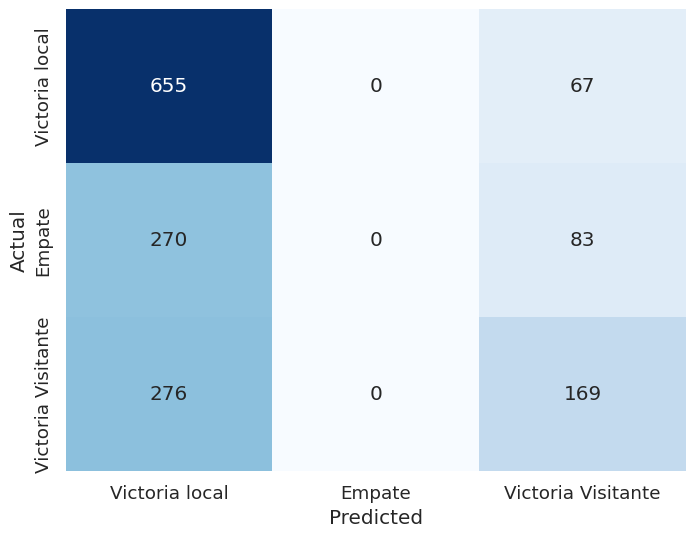

In [34]:
cm = confusion_matrix(np.array(y_true_labels), np.array(y_pred_labels), labels=["Local", "Empate", "Visitante"])
plot_confusion_matrix(cm, ["Victoria local", "Empate", "Victoria Visitante"], title="cm_fl_españa")

### Inglaterra

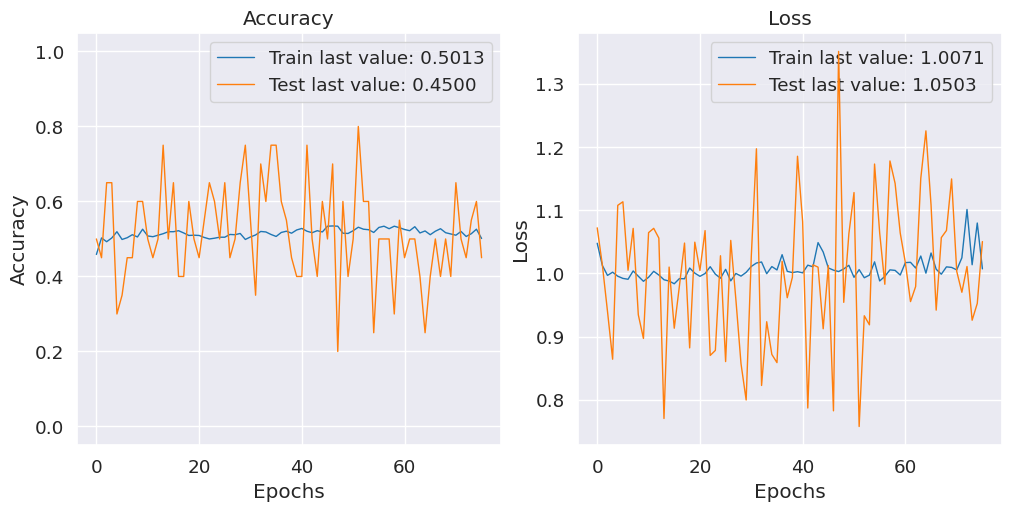

In [35]:
history_data = {
    'accuracy': [acc[1] for acc in history.metrics_distributed_fit['accuracy_train_1']],
    'val_accuracy': [acc[1] for acc in history.metrics_distributed['accuracy_test_1']],
    'loss': [loss[1] for loss in history.metrics_distributed_fit['loss_train_1']],
    'val_loss': [loss[1] for loss in history.metrics_distributed['loss_test_1']],
                }


combined_history_obj = History()
combined_history_obj.history = history_data


fig, ax = plot_history(combined_history_obj, path="plot_fl_inglaterra.png")

plt.show()

In [36]:
label_map = {0: 'Local', 1: 'Empate', 2: 'Visitante'}

history_data = {
    'y_pred': history.metrics_distributed['y_pred_1'],
    'y_true':  history.metrics_distributed['y_test_1'],
}

y_true_flat = [item for sublist in [eval(acc[1]) for acc in history_data['y_true']] for item in sublist]
y_pred_flat = [item for sublist in [eval(acc[1]) for acc in history_data['y_pred']] for item in sublist]

y_true_labels = [label_map[label] if isinstance(label, int) else label for label in y_true_flat]
y_pred_labels = [label_map[label] if isinstance(label, int) else label for label in y_pred_flat]

class_report = classification_report(
    y_true_labels, 
    y_pred_labels, 
    digits=2, 
    labels=['Local', 'Empate', 'Visitante'], 
    zero_division=0
)

print(class_report)

              precision    recall  f1-score   support

       Local       0.52      0.85      0.65       674
      Empate       0.00      0.00      0.00       386
   Visitante       0.50      0.47      0.48       460

    accuracy                           0.52      1520
   macro avg       0.34      0.44      0.38      1520
weighted avg       0.38      0.52      0.43      1520



Matriz de confusión sin normalizar


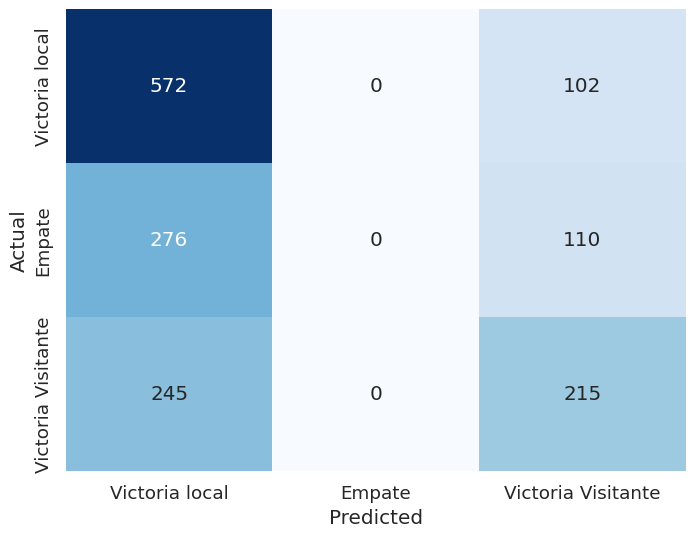

In [37]:
cm = confusion_matrix(np.array(y_true_labels), np.array(y_pred_labels), labels=["Local", "Empate", "Visitante"])
plot_confusion_matrix(cm, ["Victoria local", "Empate", "Victoria Visitante"], title="cm_fl_inglaterra")

### Italia

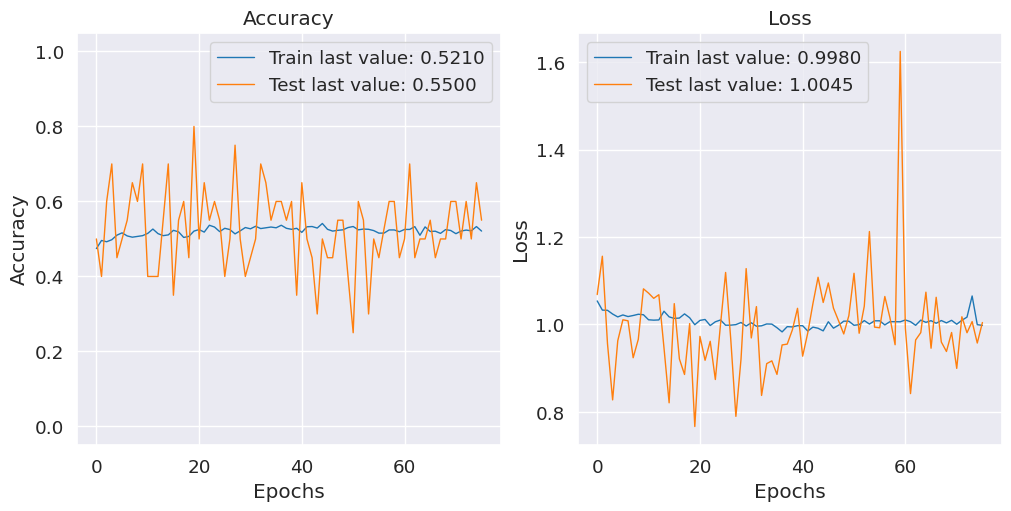

In [38]:
history_data = {
    'accuracy': [acc[1] for acc in history.metrics_distributed_fit['accuracy_train_2']],
    'val_accuracy': [acc[1] for acc in history.metrics_distributed['accuracy_test_2']],
    'loss': [loss[1] for loss in history.metrics_distributed_fit['loss_train_2']],
    'val_loss': [loss[1] for loss in history.metrics_distributed['loss_test_2']],
                }


combined_history_obj = History()
combined_history_obj.history = history_data


fig, ax = plot_history(combined_history_obj, path="plot_fl_italia.png")

plt.show()

In [39]:
label_map = {0: 'Local', 1: 'Empate', 2: 'Visitante'}

history_data = {
    'y_pred': history.metrics_distributed['y_pred_2'],
    'y_true':  history.metrics_distributed['y_test_2'],
}

y_true_flat = [item for sublist in [eval(acc[1]) for acc in history_data['y_true']] for item in sublist]
y_pred_flat = [item for sublist in [eval(acc[1]) for acc in history_data['y_pred']] for item in sublist]

y_true_labels = [label_map[label] if isinstance(label, int) else label for label in y_true_flat]
y_pred_labels = [label_map[label] if isinstance(label, int) else label for label in y_pred_flat]

class_report = classification_report(
    y_true_labels, 
    y_pred_labels, 
    digits=2, 
    labels=['Local', 'Empate', 'Visitante'], 
    zero_division=0
)

print(class_report)

              precision    recall  f1-score   support

       Local       0.54      0.86      0.66       685
      Empate       0.00      0.00      0.00       401
   Visitante       0.50      0.50      0.50       433

    accuracy                           0.53      1519
   macro avg       0.35      0.45      0.39      1519
weighted avg       0.39      0.53      0.44      1519



Matriz de confusión sin normalizar


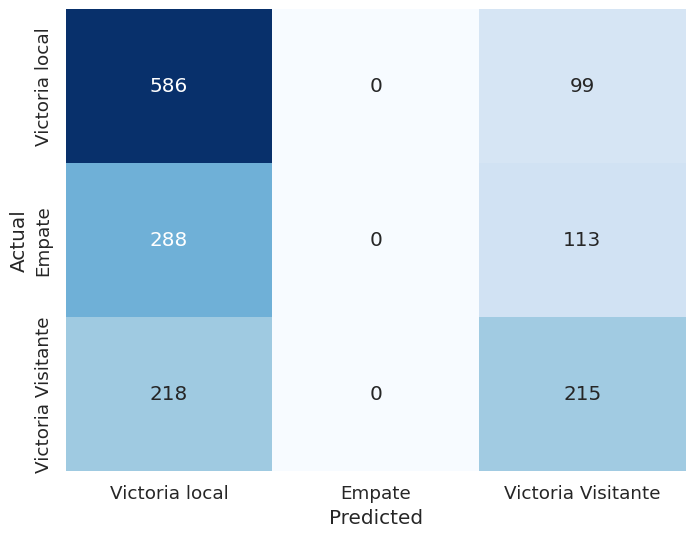

In [40]:
cm = confusion_matrix(np.array(y_true_labels), np.array(y_pred_labels), labels=["Local", "Empate", "Visitante"])
plot_confusion_matrix(cm, ["Victoria local", "Empate", "Victoria Visitante"], title="cm_fl_italia")

### Francia

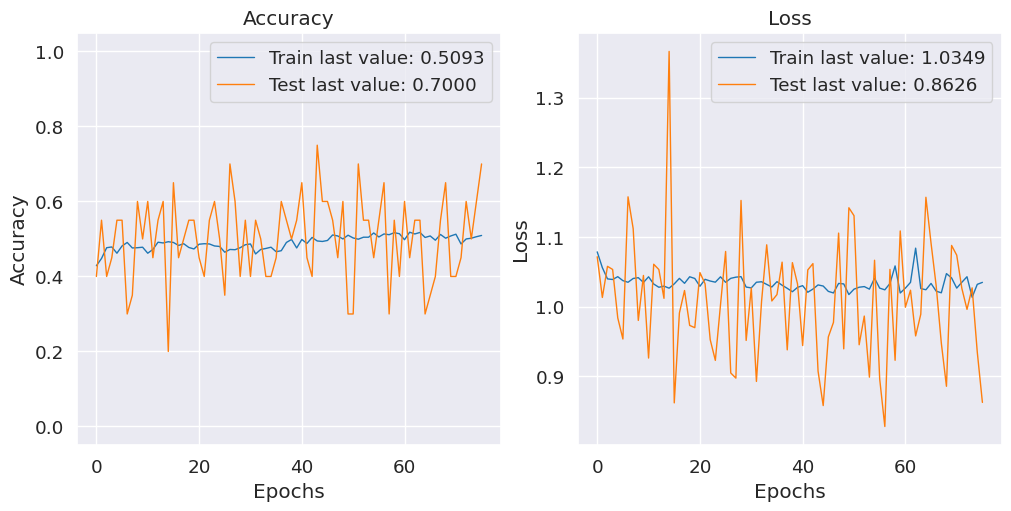

In [41]:
history_data = {
    'accuracy': [acc[1] for acc in history.metrics_distributed_fit['accuracy_train_3']],
    'val_accuracy': [acc[1] for acc in history.metrics_distributed['accuracy_test_3']],
    'loss': [loss[1] for loss in history.metrics_distributed_fit['loss_train_3']],
    'val_loss': [loss[1] for loss in history.metrics_distributed['loss_test_3']],
                }


combined_history_obj = History()
combined_history_obj.history = history_data


fig, ax = plot_history(combined_history_obj, path="plot_fl_francia.png")

plt.show()

In [42]:
label_map = {0: 'Local', 1: 'Empate', 2: 'Visitante'}

history_data = {
    'y_pred': history.metrics_distributed['y_pred_3'],
    'y_true':  history.metrics_distributed['y_test_3'],
}

y_true_flat = [item for sublist in [eval(acc[1]) for acc in history_data['y_true']] for item in sublist]
y_pred_flat = [item for sublist in [eval(acc[1]) for acc in history_data['y_pred']] for item in sublist]

y_true_labels = [label_map[label] if isinstance(label, int) else label for label in y_true_flat]
y_pred_labels = [label_map[label] if isinstance(label, int) else label for label in y_pred_flat]

class_report = classification_report(
    y_true_labels, 
    y_pred_labels, 
    digits=2, 
    labels=['Local', 'Empate', 'Visitante'], 
    zero_division=0
)

print(class_report)

              precision    recall  f1-score   support

       Local       0.51      0.85      0.64       679
      Empate       0.00      0.00      0.00       412
   Visitante       0.48      0.44      0.46       429

    accuracy                           0.50      1520
   macro avg       0.33      0.43      0.36      1520
weighted avg       0.36      0.50      0.41      1520



Matriz de confusión sin normalizar


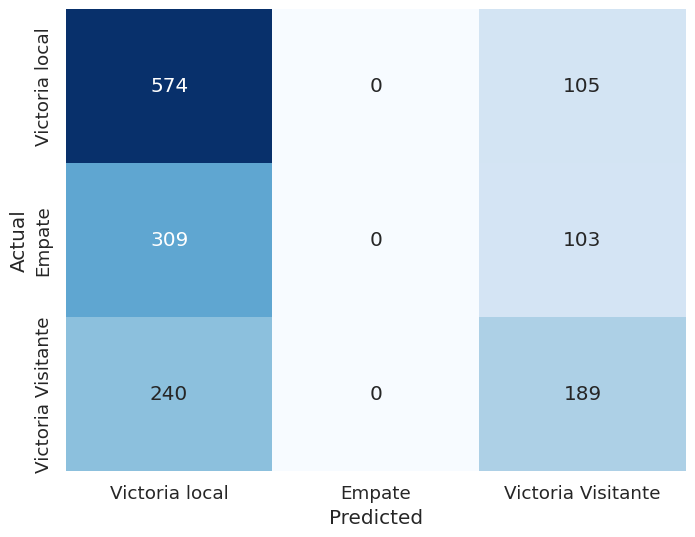

In [43]:
cm = confusion_matrix(np.array(y_true_labels), np.array(y_pred_labels), labels=["Local", "Empate", "Visitante"])
plot_confusion_matrix(cm, ["Victoria local", "Empate", "Victoria Visitante"], title="cm_fl_francia")

### Alemania

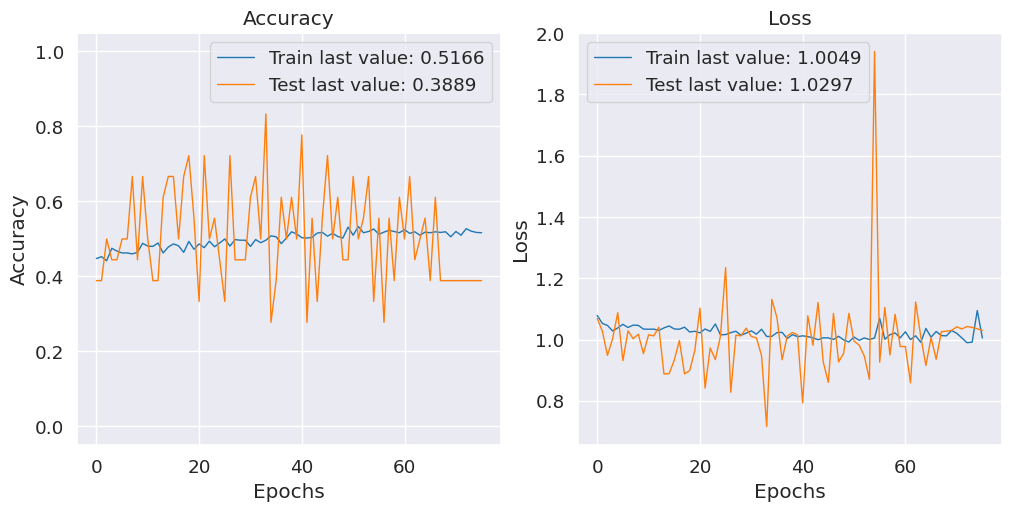

In [44]:
history_data = {
    'accuracy': [acc[1] for acc in history.metrics_distributed_fit['accuracy_train_4']],
    'val_accuracy': [acc[1] for acc in history.metrics_distributed['accuracy_test_4']],
    'loss': [loss[1] for loss in history.metrics_distributed_fit['loss_train_4']],
    'val_loss': [loss[1] for loss in history.metrics_distributed['loss_test_4']],
                }


combined_history_obj = History()
combined_history_obj.history = history_data


fig, ax = plot_history(combined_history_obj, path="plot_fl_alemania.png")

plt.show()

In [45]:
label_map = {0: 'Local', 1: 'Empate', 2: 'Visitante'}

history_data = {
    'y_pred': history.metrics_distributed['y_pred_4'],
    'y_true':  history.metrics_distributed['y_test_4'],
}

y_true_flat = [item for sublist in [eval(acc[1]) for acc in history_data['y_true']] for item in sublist]
y_pred_flat = [item for sublist in [eval(acc[1]) for acc in history_data['y_pred']] for item in sublist]

y_true_labels = [label_map[label] if isinstance(label, int) else label for label in y_true_flat]
y_pred_labels = [label_map[label] if isinstance(label, int) else label for label in y_pred_flat]

class_report = classification_report(
    y_true_labels, 
    y_pred_labels, 
    digits=2, 
    labels=['Local', 'Empate', 'Visitante'], 
    zero_division=0
)

print(class_report)

              precision    recall  f1-score   support

       Local       0.50      0.89      0.64       611
      Empate       0.00      0.00      0.00       327
   Visitante       0.54      0.35      0.42       430

    accuracy                           0.51      1368
   macro avg       0.35      0.41      0.35      1368
weighted avg       0.39      0.51      0.42      1368



Matriz de confusión sin normalizar


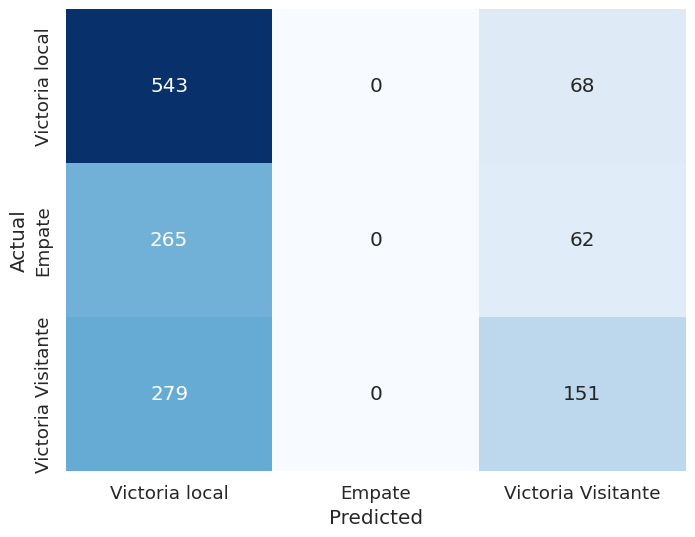

In [46]:
cm = confusion_matrix(np.array(y_true_labels), np.array(y_pred_labels), labels=["Local", "Empate", "Visitante"])
plot_confusion_matrix(cm, ["Victoria local", "Empate", "Victoria Visitante"], title="cm_fl_alemania")

# 5. Conclusiones

En primer lugar se va a comparar el rendimiento del Aprendizaje Automático Centralizado contra el Aprendizaje Federado evaluado globalmente. Como se puede observar en las métricas de evaluación no hay mucha diferencia entre ambos enfoques, ya que en el enfoque centralizado el modelo acierta ligeramente más victorias visitantes, pero menos victorias locales que en el enfoque federado. Sin embargo, el modelo federado tiende a predecir en exceso las victorias locales, lo que sugiere que las características específicas de cada conjunto de datos locales pueden estar influyendo en el sesgo del modelo. En contraste, el modelo centralizado, al consolidar todos los datos en un solo lugar, podría estar capturando una representación más equilibrada del problema.

En segundo lugar, se va a comparar el rendimiento entre el entrenamiento local y el Aprendizaje Federado evaluado desde el cliente. En este análisis, no se observan diferencias significativas en los resultados. Esto se debe a que el entrenamiento local en cada liga mejora los resultados obtenidos del Aprendizaje Centralizado con todos los datos. El Aprendizaje Federado tiende a ser más efectivo cuando cada cliente tiene muy pocos datos, y los resultados del entrenamiento local son deficientes. En tales casos, la incorporación de información en los clientes, permite al modelo mejorar su desempeño. Sin embargo, en este caso, al federar, el modelo se asemeja más al centralizado, por lo que la mejora no es tan evidente. No obstante, se han observado ligeras mejoras con el enfoque federado en casi todos los países. Así, se demuestra que el Aprendizaje Federado es especialmente útil cuando no es factible centralizar los datos.

Por último, también destaca la incapacidad del modelo para predecir empates en todos los experimentos. Este suceso afecta significativamente al *accuracy* de los modelos, ya que las victorias locales y visitantes muestran buenos resultados. La complejidad de predicción de esta clase se ha tratado en varios artículos, donde se observa una baja tasa de acierto que afecta al rendimiento global del modelo. Además, en algunos artículos se ha llegado a convertir este problema multiclase en uno de clasificación binaria, en el cual las clases son: Gana local ("Local") y No Gana Local ("Empate" y "Visitante").